 1. How many tennis players are included in the dataset? 

Importing Libraries:

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Loading Data we need:

In [5]:
# Folder Paths

folder_path_match = Path('../data/input/raw_match_parquet')
folder_path_odds = Path('../data/input/raw_odds_parquet')
folder_path_pbp = Path('../data/input/raw_point_by_point_parquet')
folder_path_stat = Path('../data/input/raw_statistics_parquet')
folder_path_power =  Path('../data/input/raw_tennis_power_parquet')
folder_path_votes = Path('../data/input/raw_votes_parquet')

# Home Team Data

all_home_team_dfs = []

for parquet_file in folder_path_match.glob('home_team_*.parquet'):
    if "score" in parquet_file.name:
        continue
    try:
        df = pd.read_parquet(parquet_file)
        all_home_team_dfs.append(df)
    except Exception as e:
        print(f"Error reading {parquet_file.name}: {type(e).__name__}: {e}")

if all_home_team_dfs:
    home_team_data = pd.concat(all_home_team_dfs, ignore_index = True)
    print(f"Number of {len(all_home_team_dfs)} home team parquet files.")
else:
    print("No home_team_ flile was found.")


# Away Team Data

all_away_team_dfs = []

for parquet_file in folder_path_match.glob('away_team_*.parquet'):
    if "score" in parquet_file.name:
        continue
    try:
        df = pd.read_parquet(parquet_file)
        all_away_team_dfs.append(df)
    except Exception as e:
        print(f"Error reading {parquet_file.name}: {type(e).__name__}: {e}")

if all_away_team_dfs:
    away_team_data = pd.concat(all_away_team_dfs, ignore_index = True)
    print(f"Number of {len(all_away_team_dfs)} away team parquet files.")
else:
    print("No away_team_ file was found.")


C:\Users\Parsan Afzar\AppData\Local\Temp\ipykernel_16232\1951771565.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  home_team_data = pd.concat(all_home_team_dfs, ignore_index = True)


Number of 12389 home team parquet files.


C:\Users\Parsan Afzar\AppData\Local\Temp\ipykernel_16232\1951771565.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  away_team_data = pd.concat(all_away_team_dfs, ignore_index = True)


Number of 11690 away team parquet files.


In [6]:
# Time Data

time_dfs = []

for parquet_file in folder_path_match.glob('time_*.parquet'):
    try:
        df = pd.read_parquet(parquet_file)
        time_dfs.append(df)
    except Exception as e:
        print(f"Error reading {parquet_file.name}: {type(e).__name__}: {e}")

if time_dfs:
    time_data = pd.concat(time_dfs, ignore_index=True)
    print(f"Successfully combined {len(time_dfs)} away team parquet files.")
else:
    print("No time_ file was found.")

Successfully combined 16873 away team parquet files.


In [8]:
# Power Data
power_dfs = []

for parquet_file in folder_path_power.glob('power_*.parquet'):
    try:
        df = pd.read_parquet(parquet_file)
        power_dfs.append(df)
    except Exception as e:
        print(f"Error reading {parquet_file.name}: {type(e).__name__}: {e}")

if power_dfs:
    power_data = pd.concat(power_dfs, ignore_index=True)
    print(f"Successfully combined {len(power_dfs)} event parquet files.")
else:
    print("No 'event_*.parquet'files was found.")

Successfully combined 11121 event parquet files.


In [21]:
# statistic Data

statistic_dfs = []

stat_categories = [
    ('aces', folder_path_stat),
    ('double_faults', folder_path_stat)
]

for stat_name, folder_path in stat_categories:
    for parquet_file in folder_path.glob('statistics_*.parquet'):
        try:
            df = pd.read_parquet(parquet_file)
            df = df[df['statistic_name'] == stat_name]
            statistic_dfs.append(df)
        except Exception as e:
            print(f"Error reading {parquet_file.name} for '{stat_name}': {type(e).__name__}: {e}")

if statistic_dfs:
    statistic_data = pd.concat(statistic_dfs, ignore_index=True)
    print(f" Successfully combined {len(statistic_dfs)} statistic parquet files.")
else:
    print(" No'statistics_*.parquet' files were found.")


 Successfully combined 22786 statistic parquet files.


In [46]:
# Event Data

event_dfs = []
for parquet_file in folder_path_match.glob('event_*.parquet'):
    try:
         df = pd.read_parquet(parquet_file)
         event_dfs.append(df)
    except Exception as e:
        print(f"Error reading {parquet_file.name} for '{stat_name}': {type(e).__name__}: {e}")

if event_dfs:
    event_data = pd.concat(event_dfs, ignore_index=True)
    print(f" Successfully combined {len(event_dfs)} event parquet files.")
else:
    print(" No'event_*.parquet' files were found.")

 Successfully combined 16873 event parquet files.


In [11]:
# Round Data

round_dfs = []

for parquet_file in folder_path_match.glob('round_*.parquet'):
    try:
        df = pd.read_parquet(parquet_file)
        round_dfs.append(df)
    except Exception as e:
        print(f"Error reading {parquet_file.name}: {type(e).__name__}: {e}")

if round_dfs:
    round_data = pd.concat(round_dfs, ignore_index=True)
    print(f"Successfully combined {len(round_dfs)} round parquet files.")
else:
    print("No round_ file was found.")

Successfully combined 9243 round parquet files.


In [12]:
# Tournament Date

tournament_dfs = []

for parquet_file in folder_path_match.glob('tournament_*.parquet'):
    try:
        df = pd.read_parquet(parquet_file)
        tournament_dfs.append(df)
    except Exception as e:
        print(f"Error reading {parquet_file.name}: {type(e).__name__}: {e}")

if tournament_dfs:
    tournament_data = pd.concat(tournament_dfs, ignore_index=True)
    print(f"Successfully combined {len(tournament_dfs)} event parquet files.")
else:
    print("No tournoment_ file was found.")

Successfully combined 16873 event parquet files.


In [38]:
# Point by Point Data
pbp_data_dfs = []

for parquet_file in folder_path_pbp.glob('pbp_*.parquet'):
    try:
        df = pd.read_parquet(parquet_file)
        pbp_data_dfs.append(df)
    except Exception as e:
        print(f"Error reading {parquet_file.name}: {e}")


if pbp_data_dfs:
    pbp_data = pd.concat(pbp_data_dfs, ignore_index=True)
    print(f"Successfully combined {len(pbp_data_dfs)} pbd_data parquet files.")
else:
    print("No pbp_ file was found.")

Successfully combined 10956 pbd_data parquet files.


Question 1: How many tennis players are included in the dataset? 


---Number of Tennis Players in the Dataset (Excluding Nulls) ---
                       Category  Count
       Unique Home Team Players   2447
       Unique Away Team Players   2479
Total Unique Players (Combined)   2644


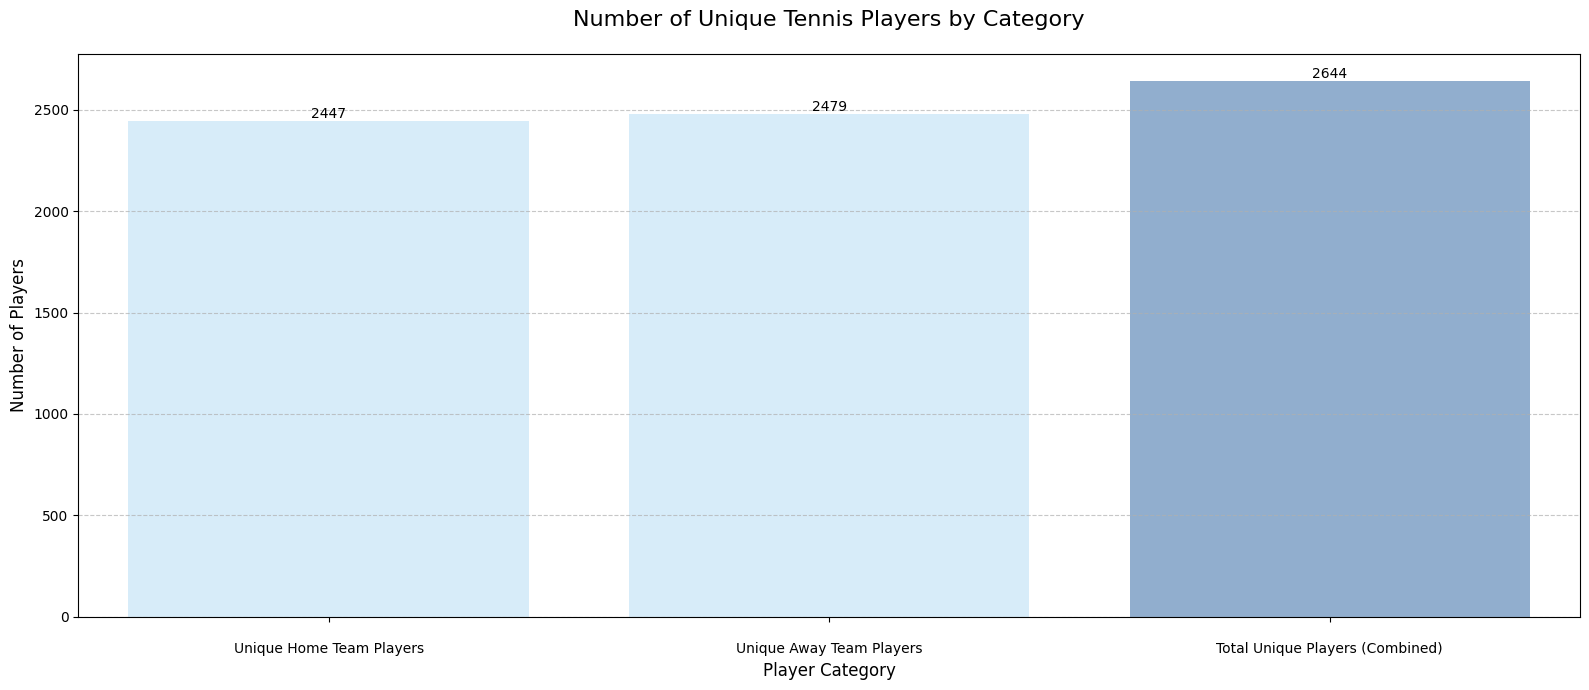

In [10]:
## Getting unique player_ids

# Home Team Data
if 'player_id' in home_team_data.columns and not home_team_data['player_id'].empty:
    unique_home_players = home_team_data['player_id'].dropna().nunique()
else:
    unique_home_players = 0
    print("Could not find the player_id column in home team data")

# Away Team Data
if 'player_id' in away_team_data.columns and not away_team_data['player_id'].empty:
    unique_away_players = away_team_data['player_id'].dropna().nunique()
else:
    unique_away_players = 0
    print("Could not find the player_id column in home team data")

## Combining all player_ids:

if 'player_id' in home_team_data.columns and 'player_id' in away_team_data.columns:
    all_player_ids = pd.concat([home_team_data['player_id'], away_team_data['player_id']]).dropna()
    total_unique_players = all_player_ids.nunique()
else:
    total_unique_players = 0
    print("Can not calculate players. Sorry!")

## Drawing a Table
player_data = {
    'Category': ['Unique Home Team Players', 'Unique Away Team Players', 'Total Unique Players (Combined)'],
    'Count': [unique_home_players, unique_away_players, total_unique_players]
}

player_table = pd.DataFrame(player_data)

print("\n---Number of Tennis Players in the Dataset (Excluding Nulls) ---")
print(player_table.to_string(index=False))

## Visualizing the Result
plt.figure(figsize = (16,7))
bar_colors = ['#d1eeff', '#d1eeff', '#87aed8']
sns.barplot(x='Category', y='Count', data=player_table, palette=bar_colors, hue='Category', legend=False)
plt.title("Number of Unique Tennis Players by Category", fontsize=16, pad=20)
plt.xlabel('Player Category', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(fontsize = 10)
plt.tick_params(axis='x', pad=15)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, row in player_table.iterrows():
    text_y_position = row['Count'] + 0.1 if row['Count'] > 0 else 0.1
    plt.text(index, text_y_position, str(row['Count']), color='black', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output')
file_name = "Number of Unique Tennis Players.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

Question 2: What is the average height of the players?

Combined all players data shape: (24079, 10)
Median height used for filling NaN values: 1.83
The Arithmetic Mean of Player Heights is: 1.83
Mode of Height: 1.83


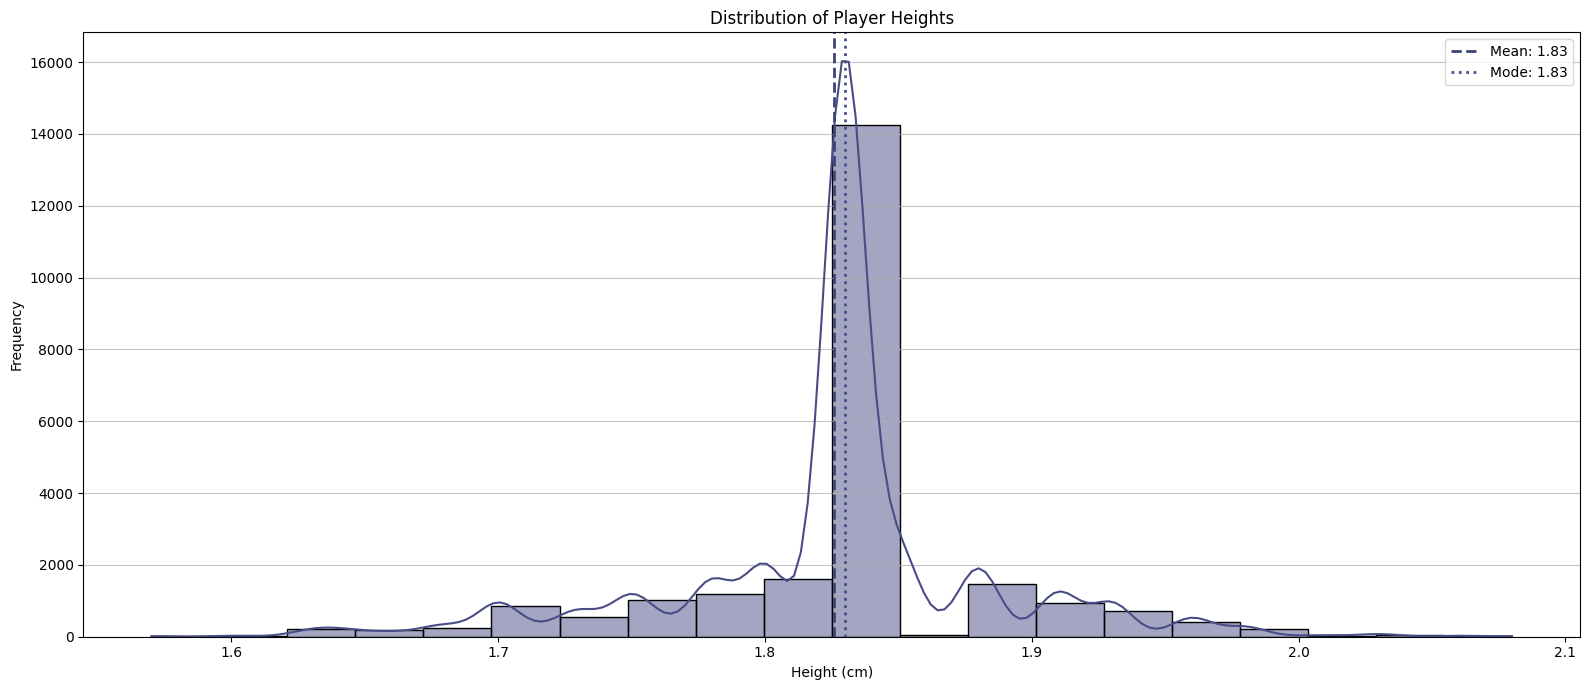

NameError: name 'df_top' is not defined

<Figure size 1400x600 with 0 Axes>

In [11]:
## Combining Home and Away Teams

if not home_team_data.empty and not away_team_data.empty:
    all_players_data = pd.concat([home_team_data, away_team_data], ignore_index=True)
    print(f"Combined all players data shape: {all_players_data.shape}")
elif not home_team_data.empty:
    all_players_data = home_team_data.copy()
    print(f"Only home team data available, shape: {all_players_data.shape}")
elif not away_team_data.empty:
    all_players_data = away_team_data.copy()
    print(f"Only away team data available, shape: {all_players_data.shape}")
else:
    all_players_data = pd.DataFrame(columns=['match_id', 'player_id', 'full_name', 'height', 'country'])
    print("No player data loaded from either home or away teams.")

if 'height' not in all_players_data.columns:
    print("Error: The 'height' column was not found in the combined player data. Exiting.")
    exit()

## Replacing NaN Values

if not all_players_data['height'].empty:
    median_height = all_players_data['height'].median()
    all_players_data['height'] = all_players_data['height'].fillna(median_height)
    print(f"Median height used for filling NaN values: {median_height:.2f}")
else:
    print("No height data available to calculate median or fill NaNs.")

## The Arithmetic Mean

if not all_players_data['height'].empty:
    arithmetic_avg_height = all_players_data['height'].mean()
    print(f"The Arithmetic Mean of Player Heights is: {arithmetic_avg_height:.2f}")
else:
    print("Cannot calculate the arithmetic average: No valid height data.")

## Finding the Mode

if not all_players_data['height'].empty:
    mode_height = all_players_data['height'].mode()
    if isinstance(mode_height, pd.Series):
        for mode_val in mode_height:
            print(f"Mode of Height: {mode_val:.2f}")
    else:
        print(f"Mode of Height: {mode_height:.2f}")
else:
    print("Cannot calculate the Mode: No valid height data.")


## Visualizing the Data:

if not all_players_data['height'].empty:
    plt.figure(figsize=(16, 7))
    sns.histplot(all_players_data['height'], kde=True, bins=20, color='#494d87')
    plt.axvline(arithmetic_avg_height, color='#3c4674', linestyle='dashed', linewidth=2, label=f'Mean: {arithmetic_avg_height:.2f}')
    if not mode_height.empty:
        for i, mode_val in enumerate(mode_height):
            plt.axvline(mode_val, color='#494d87', linestyle='dotted', linewidth=2, label=f'Mode{"" if len(mode_height) == 1 else f" {i+1}"}: {mode_val:.2f}')
    plt.title('Distribution of Player Heights')
    plt.xlabel('Height (cm)') 
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout() 

 # Saving the output as jpg.
    output_directory = Path('../data/output')
    file_name = "Distribution of Player Heights.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)

    plt.show()
else:
    print("\nCannot visualize height distribution: No valid height data after cleaning.")


## Visualizing by Countries

plt.figure(figsize=(14, 6))

sns.boxplot(
    data=df_top,
    x='country',
    y='height',
    order=top10,
    palette='pastel',
    width=0.55,
    showmeans=True,              
    meanprops=dict(marker='^',    
                   markerfacecolor='green',
                   markeredgecolor='black',
                   markersize=9)
)

plt.title('Player Height Distribution by Top-10 Countries')
plt.xlabel('Country')
plt.ylabel('Height (cm)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

 # Saving the output as jpg.
output_directory = Path('../data/output')
file_name = "Player Height Distribution by Top 10 Countries.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

Question 3: Which player has the highest number of wins?

Total actual winners found: 2320
winning_full_name
Popko, Dmitry                        29
Chidekh, Clement                     22
Gengel, Marek                        21
Jianu, Filip Cristian                21
Dellien Velasco, Murkel Alejandro    20
                                     ..
Ahn, Yu Jin                           1
Chepelev, Andrey                      1
Zielinski, Marcel                     1
Seggerman, Ryan                       1
Leon, Sabastiani                      1
Name: count, Length: 2320, dtype: int64
 'Popko, Dmitry' with 29 wins.


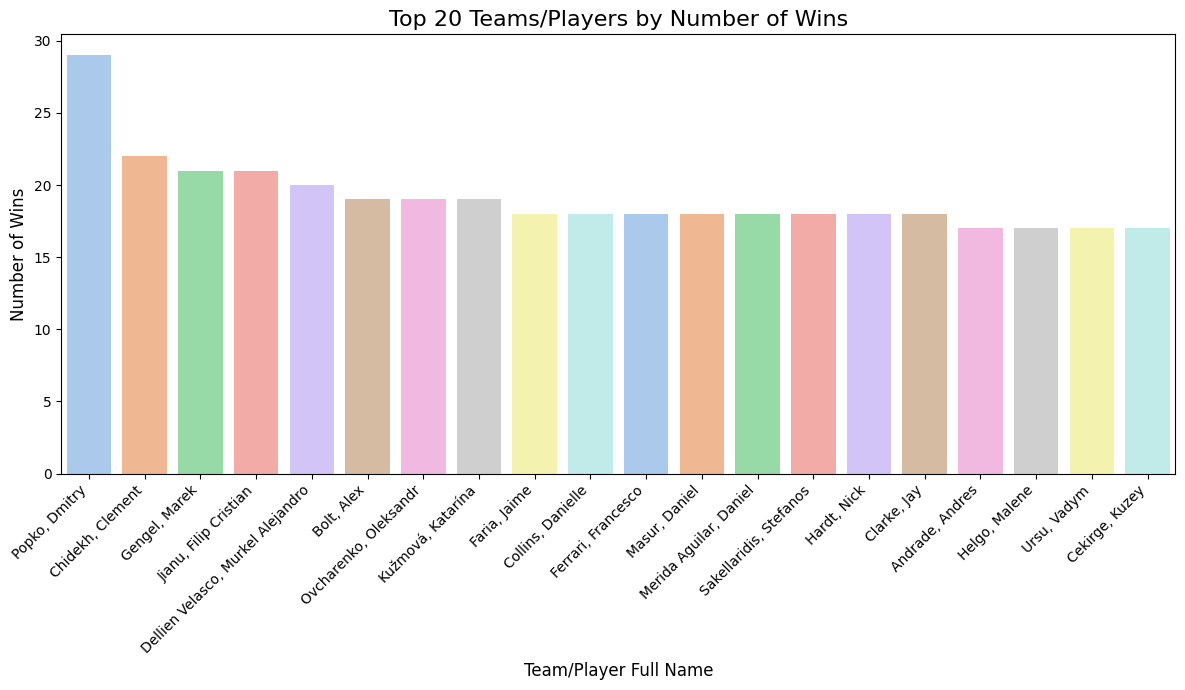

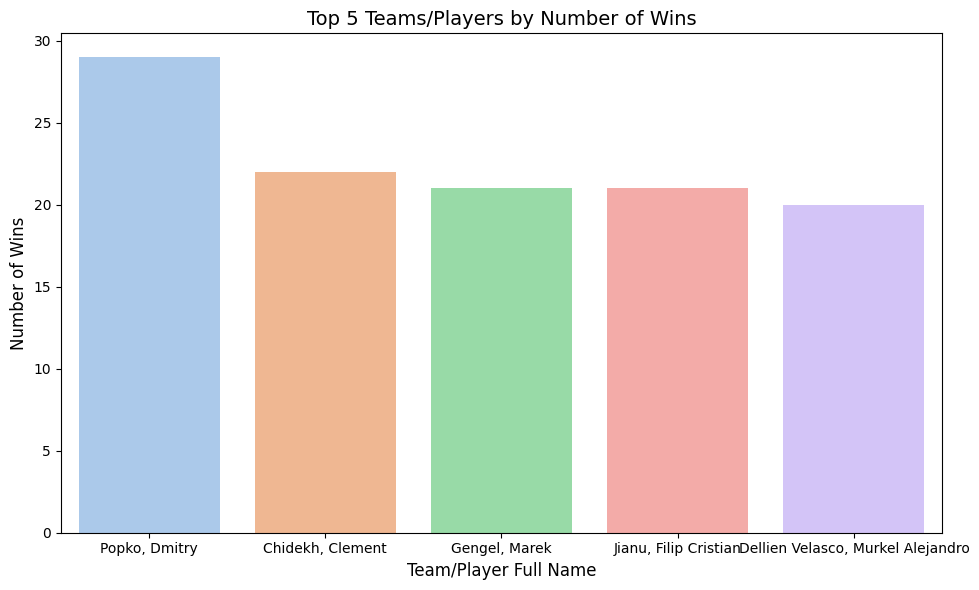

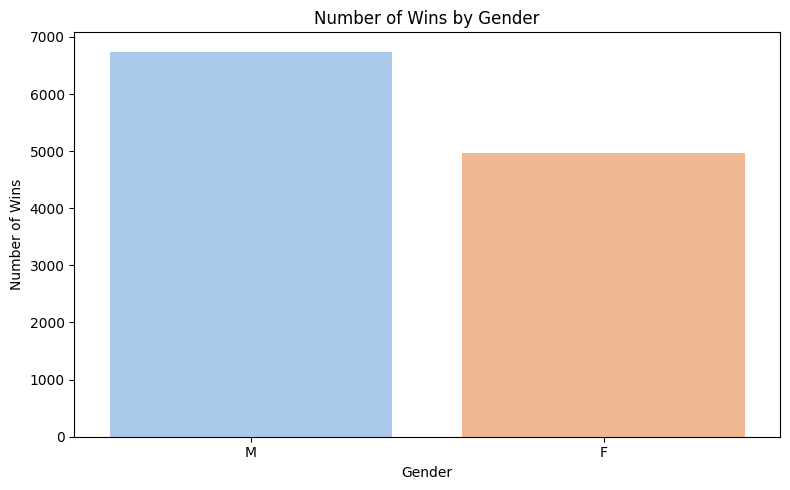

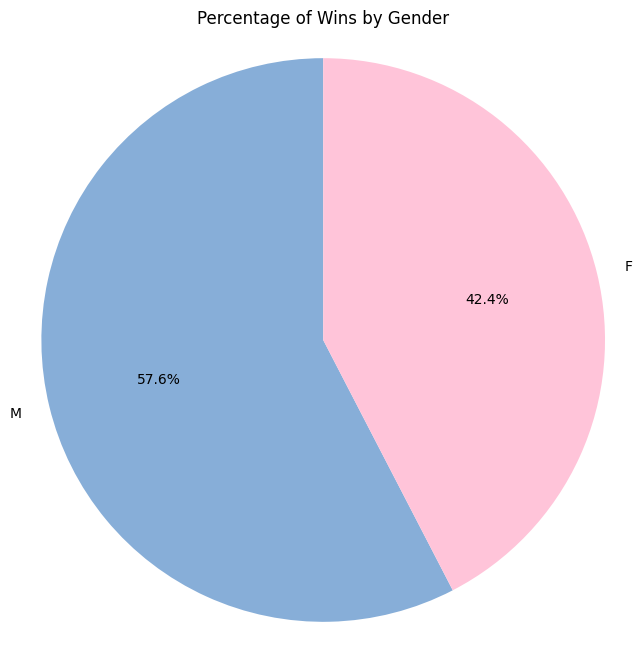

In [ ]:
## Merging Data Frames and Handling NaNs

merged_df = pd.merge(events_data, away_team_data, on='match_id', how='left')
merged_df = pd.merge(merged_df, home_team_data, on='match_id', how='left', suffixes=('_away_team', '_home_team'))
columns_to_fill = ['full_name_away_team', 'full_name_home_team', 'gender_away_team', 'gender_home_team']
merged_df[columns_to_fill] = merged_df[columns_to_fill].fillna('Not Mentioned')

## Finding the Winning Name and Gender:

def get_winning_info(row):
    winner_code = row['winner_code']
    
    if winner_code == 1:
        return row['full_name_home_team'], row['gender_home_team']
    elif winner_code == 2:
        return row['full_name_away_team'], row['gender_away_team']
    else:
        return 'Not Mentioned', 'Not Mentioned' 

merged_df[['winning_full_name', 'winner_gender']] = merged_df.apply(get_winning_info, axis=1, result_type='expand')

excluded_winners = ['Not Mentioned', None] 
actual_winner_counts = merged_df[~merged_df['winning_full_name'].isin(excluded_winners)]['winning_full_name'].value_counts()

if not actual_winner_counts.empty:
    print(f"Total actual winners found: {len(actual_winner_counts)}")
    print(actual_winner_counts)
    most_wins_full_name = actual_winner_counts.index[0]
    most_wins_count = actual_winner_counts.iloc[0]
    print(f" '{most_wins_full_name}' with {most_wins_count} wins.")
else:
    print("\nNo player wins found.")

## Visualizing Full Name Wins:

# Top 20 players
top_n = 20 
top_winners = actual_winner_counts.head(top_n)

if not top_winners.empty:
    plt.figure(figsize=(12, 7)) 
    
    sns.barplot(x=top_winners.index, y=top_winners.values, hue=top_winners.index, palette='pastel', legend=False)
    
    plt.title(f'Top {len(top_winners)} Teams/Players by Number of Wins', fontsize=16)
    plt.xlabel('Team/Player Full Name', fontsize=12)
    plt.ylabel('Number of Wins', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()

     # Saving the output as png.
    output_directory = Path('../data/output')
    file_name = "Top 20 wins.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)
    
    plt.show()

# Top 5 Players
top_n_5 = 5
top_winners_5 = actual_winner_counts.head(top_n_5)
    
if len(top_winners_5) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_winners_5.index, y=top_winners_5.values, hue=top_winners_5.index, palette='pastel', legend=False)
    plt.title(f'Top {len(top_winners_5)} Teams/Players by Number of Wins', fontsize=14)
    plt.xlabel('Team/Player Full Name', fontsize=12)
    plt.ylabel('Number of Wins', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    
    # Saving the output as png.
    output_directory = Path('../data/output')
    file_name = "Top 5 Wins.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)

    plt.show()

## Visualizing by Gender:

filtered_gender_df = merged_df[~merged_df['winning_full_name'].isin(excluded_winners)].copy()
filtered_gender_df = filtered_gender_df[filtered_gender_df['winner_gender'] != 'Not Mentioned']

if not filtered_gender_df.empty:
    winner_gender_counts = filtered_gender_df['winner_gender'].value_counts()
    
    # Bar plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=winner_gender_counts.index, y=winner_gender_counts.values, hue=winner_gender_counts.index, palette='pastel', legend=False)
    plt.title('Number of Wins by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Number of Wins')
    plt.tight_layout()

    # Saving the output as png.
    output_directory = Path('../data/output')
    file_name = "Winners by Gender.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)

    plt.show()
    
    # Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(winner_gender_counts, labels=winner_gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#87aed8', '#ffc4d9'])
    plt.title('Percentage of Wins by Gender')
    plt.axis('equal') 

    # Saving the output as png.
    output_directory = Path('../data/output')
    file_name = "Winners by Gender Pie.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)

    plt.show()
else:
    print("\nNo gender data to plot.")

Question 4: What is the longest match recorded in terms of duration?

The longest match recorded is Match ID: 12063611
Total Duration: 336790.0


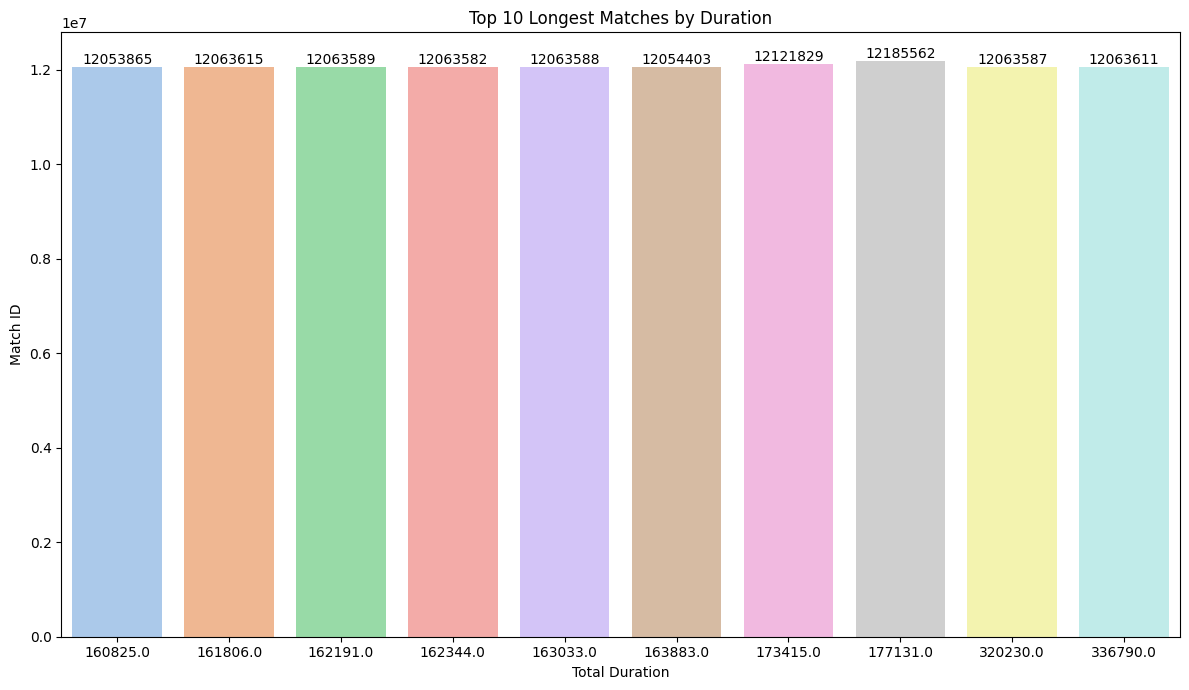

C:\Users\Parsan Afzar\AppData\Local\Temp\ipykernel_15616\3707555611.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


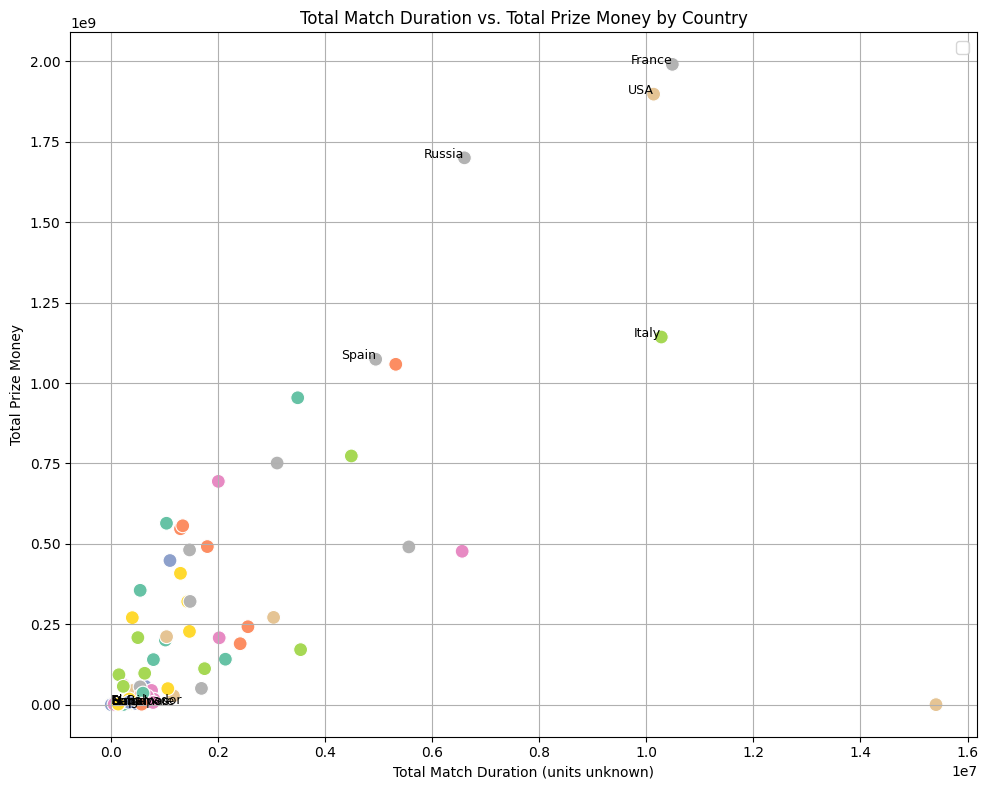

In [ ]:
## Calculating Duration and Finding the Longest Match

period_columns = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']
for col in period_columns:
    time_data[col] = pd.to_numeric(time_data[col], errors='coerce')

time_data['total_duration'] = time_data[period_columns].sum(axis=1)

longest_match = time_data.loc[time_data['total_duration'].idxmax()]

print(f"The longest match recorded is Match ID: {longest_match['match_id']}")
print(f"Total Duration: {longest_match['total_duration']}")

top_10_longest_matches = time_data.nlargest(10, 'total_duration')

## Visualizing the Data:

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='total_duration',
    y='match_id',
    data=top_10_longest_matches,
    palette='pastel',
    hue='total_duration',
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.xlabel('Total Duration')
plt.ylabel('Match ID')
plt.title('Top 10 Longest Matches by Duration')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q4')
file_name = "Top 10 Longerst Matches by Duration.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

## Finding the Country with the Most Prize Money and the Least Match Duration Time

if time_data.empty or away_team_data.empty or home_team_data.empty:
    print("Cannot proceed with analysis.")
else:
    period_cols = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']
    for col in period_cols:
        time_data[col] = pd.to_numeric(time_data[col], errors='coerce')
    time_data['total_duration'] = time_data[period_cols].sum(axis=1)

    merged_df = pd.merge(time_data, home_team_data, on='match_id', how='left', suffixes=('_time', '_home'))
    merged_df = pd.merge(merged_df, away_team_data, on='match_id', how='left', suffixes=('_home', '_away'))

    home_df = merged_df[['match_id', 'total_duration', 'total_prize_home', 'country_home']].copy()
    away_df = merged_df[['match_id', 'total_duration', 'total_prize_away', 'country_away']].copy()
    
    home_df.rename(columns={'total_prize_home': 'total_prize', 'country_home': 'country'}, inplace=True)
    away_df.rename(columns={'total_prize_away': 'total_prize', 'country_away': 'country'}, inplace=True)
    
    all_teams_df = pd.concat([home_df, away_df], ignore_index=True)

    all_teams_df['country'] = all_teams_df['country'].fillna('Not Mentioned')
    all_teams_df['total_prize'] = pd.to_numeric(all_teams_df['total_prize'], errors='coerce').fillna(0)
    
    country_summary = all_teams_df.groupby('country').agg(
        total_prize=('total_prize', 'sum'),
        total_duration=('total_duration', 'sum')
    ).reset_index()

    most_prize_country = country_summary.loc[country_summary['total_prize'].idxmax()]

    least_time_country = country_summary.loc[country_summary['total_duration'].idxmin()]

## Visualizing the Data


plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=country_summary,
    x='total_duration',
    y='total_prize',
    hue='country',
    s=100,
    palette='Set2',
    legend=False 
    )
plt.legend(fontsize=12)


for i, row in country_summary.nlargest(5, 'total_prize').iterrows():
    plt.text(row['total_duration'], row['total_prize'], row['country'], fontsize=9, ha='right')
for i, row in country_summary.nsmallest(5, 'total_duration').iterrows():
    plt.text(row['total_duration'], row['total_prize'], row['country'], fontsize=9, ha='left')

plt.title('Total Match Duration vs. Total Prize Money by Country')
plt.xlabel('Total Match Duration (units unknown)')
plt.ylabel('Total Prize Money')
plt.grid(True)
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q4')
file_name = "Total Match Duration vs. Total Prize Money by Country.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)


plt.show()

Question 5: How many sets are typically played in a tennis match?

The average number of sets played per match is: 2.28


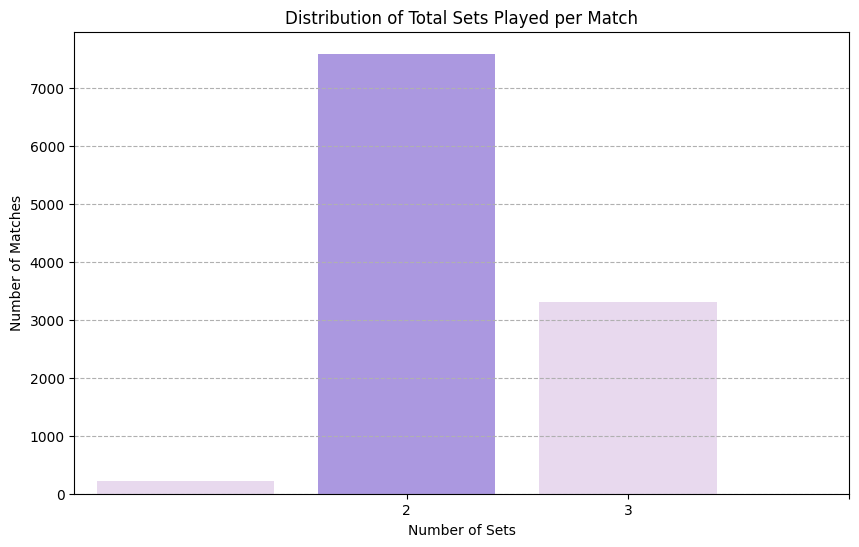

winner_plays
right-handed    87.744843
left-handed     12.255157
Name: proportion, dtype: float64


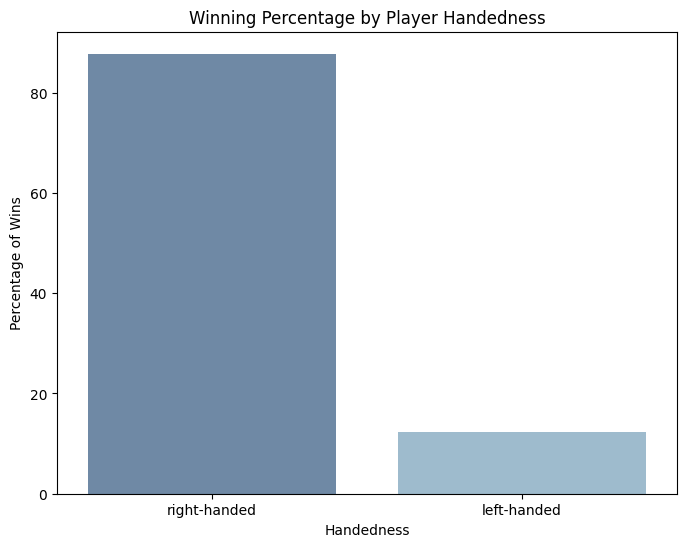

In [ ]:
## Typical Number of Sets

if 'power_data' in locals():

    sets_per_match = power_data.groupby('match_id')['set_num'].max().reset_index()
    sets_per_match.rename(columns={'set_num': 'total_sets'}, inplace=True)
    
    average_sets = sets_per_match['total_sets'].mean()
    print(f"The average number of sets played per match is: {average_sets:.2f}")

    # Visualizing it
    plt.figure(figsize=(10, 6))
    colors = ['#e9d5f2',"#a68cec", "#e9d5f2"]
    sns.countplot(
    data=sets_per_match,
    x='total_sets',
    hue='total_sets',
    palette=colors,
    legend= False)
    plt.title('Distribution of Total Sets Played per Match')
    plt.xlabel('Number of Sets')
    plt.ylabel('Number of Matches')
    plt.xticks(np.arange(sets_per_match['total_sets'].min(), sets_per_match['total_sets'].max() + 1))
    plt.grid(axis='y', linestyle='--')

    # Saving the output as png.
    output_directory = Path('../data/output/Q5')
    file_name = "Distribution of Total Sets Played per Match.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)

    plt.show()
else:
    print("Error: 'power_data' DataFrame  was not found.")

# Winning Percentage by Player Handedness

home_cols = ['match_id', 'plays']
away_cols = ['match_id', 'plays']

home_min = home_team_data[home_cols].rename(columns={'plays': 'plays_home'})
away_min = away_team_data[away_cols].rename(columns={'plays': 'plays_away'})

matches_df = events_data.merge(home_min, on='match_id', how='left') \
                        .merge(away_min, on='match_id', how='left')

matches_df['winner_plays'] = np.where(
    matches_df['winner_code'] == 'home',
    matches_df['plays_home'],
    matches_df['plays_away']
)

handedness_win_rates = matches_df['winner_plays'].value_counts(normalize=True) * 100
print(handedness_win_rates)

plt.figure(figsize=(8, 6))
colors = ['#6689ae', '#96bdd5']
sns.barplot(x=handedness_win_rates.index, y=handedness_win_rates.values, palette=colors, hue=handedness_win_rates.index, legend=False)
plt.title('Winning Percentage by Player Handedness')
plt.xlabel('Handedness')
plt.ylabel('Percentage of Wins')

# Saving the output as png.
output_directory = Path('../data/output/Q5')
file_name = "inning Percentage by Player Handedness.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()
    

Question 6 : Which country has produced the most successful tennis players?

Top 10 countries by number of match wins:
winning_country
France            992
Italy             930
USA               889
Russia            621
Germany           557
Spain             540
Argentina         509
Japan             493
Australia         430
United Kingdom    355
Name: count, dtype: int64


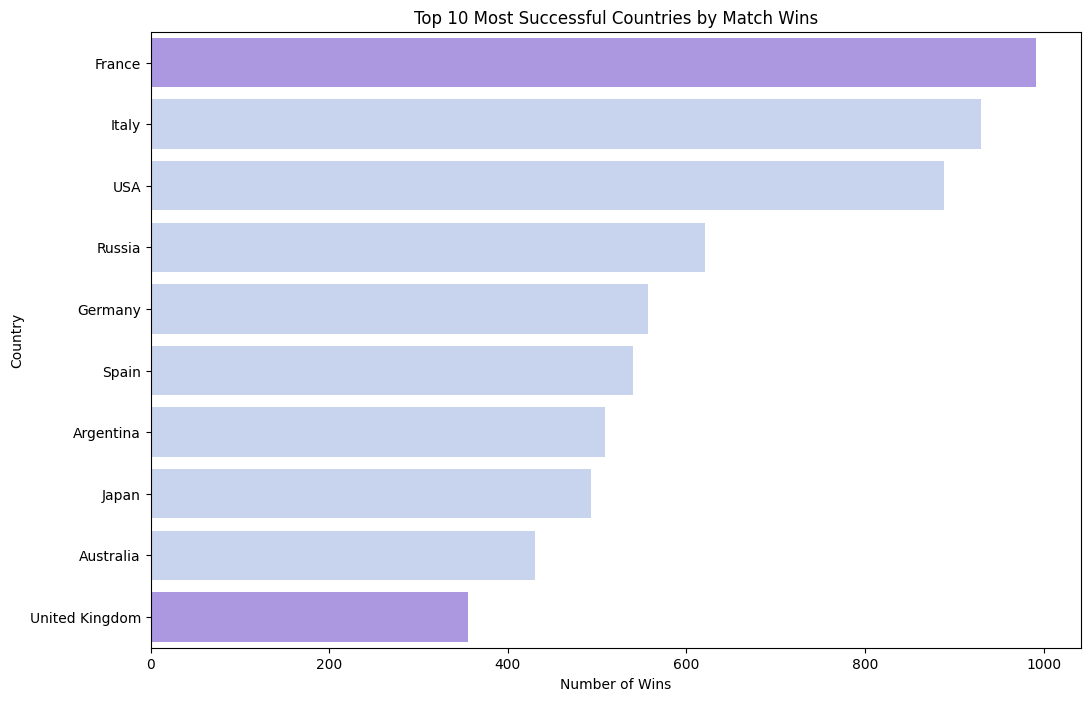

Top 10 countries with the best (lowest) current ranks:
country
Poland            1.0
Serbia            1.0
Belarus           2.0
Italy             2.0
Spain             2.0
USA               3.0
Germany           4.0
Kazakhstan        4.0
Russia            4.0
Czech Republic    6.0
Name: current_rank, dtype: float64


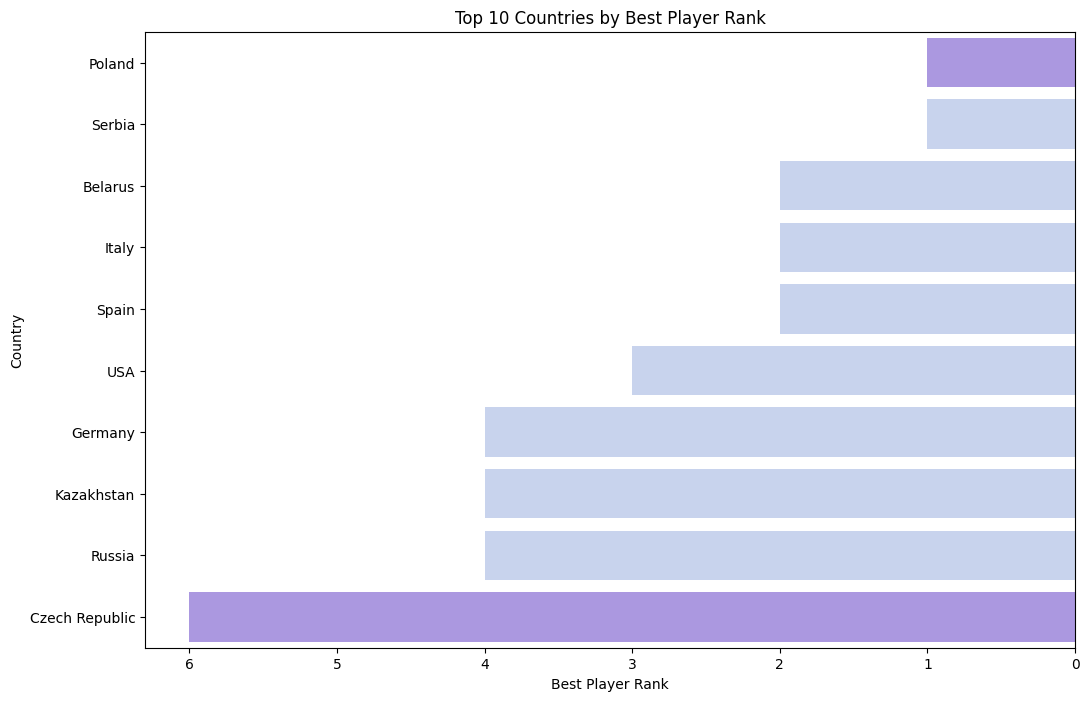

In [ ]:
## Most Match Wins by Country

if 'events_data' in locals() and 'home_team_data' in locals() and 'away_team_data' in locals():
    df_merged = pd.merge(events_data, home_team_data, on='match_id', how='left')
    
    df_merged = pd.merge(df_merged, away_team_data, on='match_id', how='left', suffixes=('_home', '_away'))
    
    df_merged['winning_country'] = np.where(df_merged['winner_code'] == 'home', 
                                           df_merged['country_home'], 
                                           df_merged['country_away'])
    
    country_win_counts = df_merged['winning_country'].value_counts()
    
    top_10_countries = country_win_counts.head(10)
    print("Top 10 countries by number of match wins:")
    print(top_10_countries)
    
    plt.figure(figsize=(12, 8))
    colors = ['#a68cec'] + ['#c2d0f3'] * 8 + ['#a68cec']
    sns.barplot(x=top_10_countries.values, y=top_10_countries.index, hue=top_10_countries.index, palette=colors, legend=False)
    plt.title('Top 10 Most Successful Countries by Match Wins')
    plt.xlabel('Number of Wins')
    plt.ylabel('Country')

    # Saving the output as png.
    output_directory = Path('../data/output/Q6')
    file_name = "Top 10 Most Successful Countries by Match Wins.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)

    plt.show()

else:
    print("Error: Required DataFrames not found.")


## Countries with the Highest Ranked Players

if 'home_team_data' in locals() and 'away_team_data' in locals():
    all_players = pd.concat([home_team_data, away_team_data], ignore_index=True)

    all_players['current_rank'] = pd.to_numeric(all_players['current_rank'], errors='coerce')
    best_ranks_by_country = all_players.groupby('country')['current_rank'].min().dropna()

    best_ranks_by_country = best_ranks_by_country.sort_values(ascending=True)

    top_10_best_ranks = best_ranks_by_country.head(10)
    print("Top 10 countries with the best (lowest) current ranks:")
    print(top_10_best_ranks)

    plt.figure(figsize=(12, 8))
    colors = ['#a68cec'] + ['#c2d0f3'] * 8 + ['#a68cec']
    sns.barplot(x=top_10_best_ranks.values, y=top_10_best_ranks.index, hue= top_10_best_ranks.index, palette=colors, legend=False)
    plt.title('Top 10 Countries by Best Player Rank')
    plt.xlabel('Best Player Rank')
    plt.ylabel('Country')
    plt.gca().invert_xaxis()

    # Saving the output as png.
    output_directory = Path('../data/output/Q6')
    file_name = "Top 10 Countries by Best Player Rank.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)
    
    plt.show()

else:
    print("Error: Required DataFrames was not found.")

Question 7: What is the average number of aces per match? 

✅ Average number of aces per match: 3.22


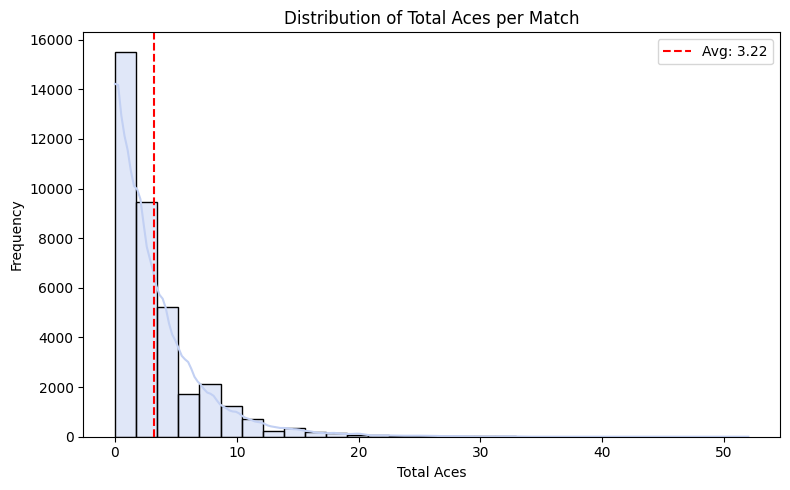

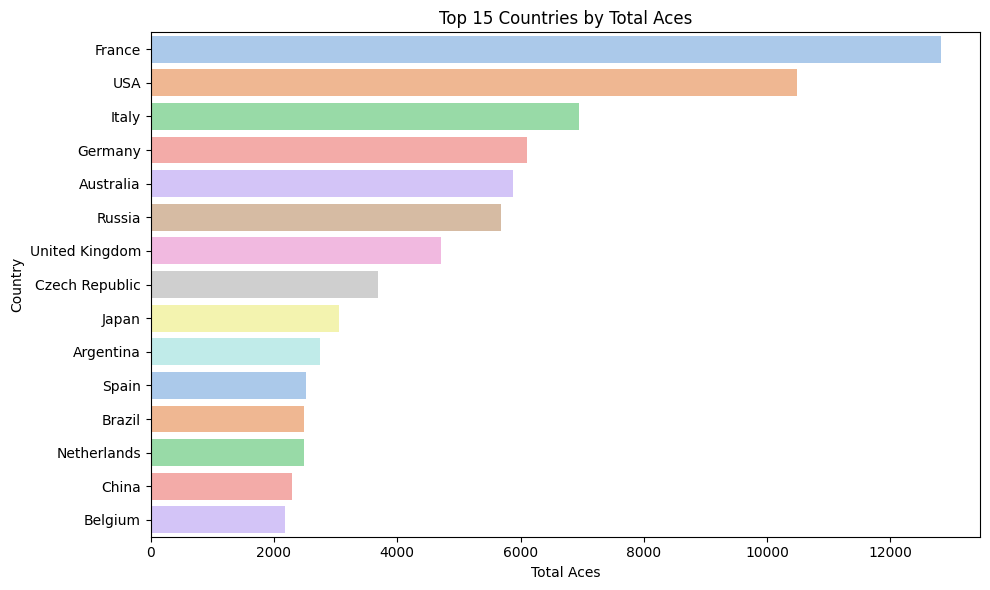

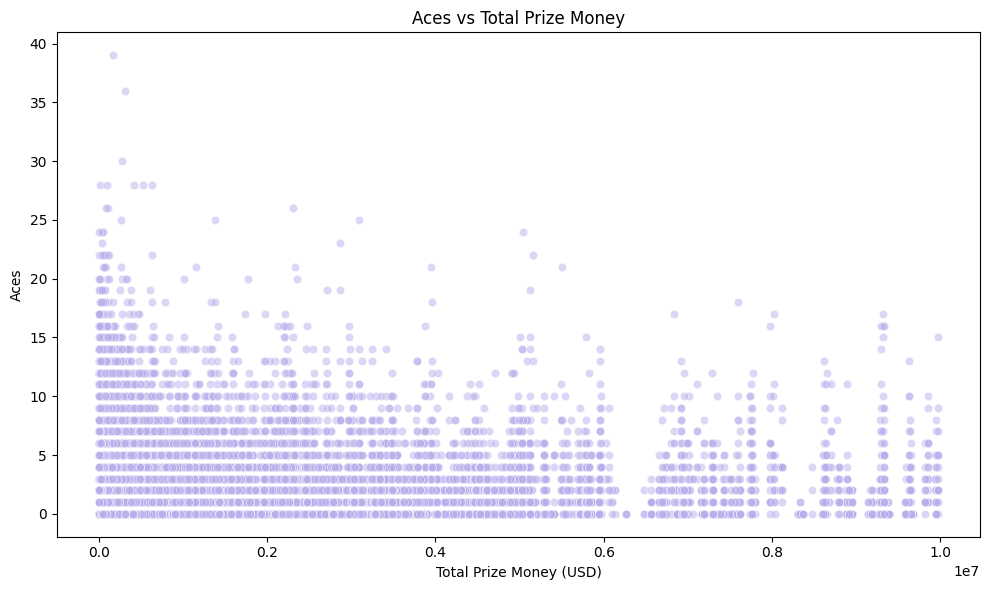

In [ ]:
## Merge statistics with home and away team data to get player info

df_merged = pd.merge(statistic_data, home_team_data, on='match_id', how='left', suffixes=('', '_home'))
df_merged = pd.merge(df_merged, away_team_data, on='match_id', how='left', suffixes=('', '_away'))

df_merged['home_value'] = pd.to_numeric(df_merged['home_value'], errors='coerce')
df_merged['away_value'] = pd.to_numeric(df_merged['away_value'], errors='coerce')

## Total aces per match
df_merged['total_aces'] = df_merged['home_value'] + df_merged['away_value']

##  Average number of aces per match
average_aces = df_merged['total_aces'].mean()
print(f"✅ Average number of aces per match: {average_aces:.2f}")

# Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df_merged['total_aces'], bins=30, kde=True, color= '#c2d0f3')
plt.axvline(average_aces, color='red', linestyle='--', label=f'Avg: {average_aces:.2f}')
plt.title('Distribution of Total Aces per Match')
plt.xlabel('Total Aces')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q7')
file_name = "Distribution of Total Aces per Match.png"
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()


## Number of aces by country

# Combine player and ace data for both home and away players
home_aces_country = df_merged[['country', 'home_value']].rename(columns={'country': 'home_country', 'home_value': 'aces'})
away_aces_country = df_merged[['country_away', 'away_value']].rename(columns={'country_away': 'away_country', 'away_value': 'aces'})

home_aces_country = home_aces_country.rename(columns={'home_country': 'country'})
away_aces_country = away_aces_country.rename(columns={'away_country': 'country'})

aces_by_country = pd.concat([home_aces_country, away_aces_country])
aces_by_country = aces_by_country.dropna()

country_ace_sum = aces_by_country.groupby('country')['aces'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_ace_sum.values, y=country_ace_sum.index, hue = country_ace_sum.index, palette='pastel')
plt.title('Top 15 Countries by Total Aces')
plt.xlabel('Total Aces')
plt.ylabel('Country')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q7')
file_name = "Top 15 Countries by Total Aces.png"
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

##  Number of aces vs total prize money

# Combine home and away prize/ace data
home_aces_prize = df_merged[['total_prize', 'home_value']].rename(columns={'home_value': 'aces'})
away_aces_prize = df_merged[['total_prize_away', 'away_value']].rename(columns={'total_prize_away': 'total_prize', 'away_value': 'aces'})

aces_by_prize = pd.concat([home_aces_prize, away_aces_prize])
aces_by_prize = aces_by_prize.dropna()
aces_by_prize['total_prize'] = pd.to_numeric(aces_by_prize['total_prize'], errors='coerce')

aces_by_prize = aces_by_prize[aces_by_prize['total_prize'] < 1e7]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=aces_by_prize, x='total_prize', y='aces', alpha=0.5, color='#b9aeec')
plt.title('Aces vs Total Prize Money')
plt.xlabel('Total Prize Money (USD)')
plt.ylabel('Aces')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q7')
file_name = "Aces vs Total Prize Money.png"
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()


Question 8: Is there a difference in the number of double faults based on gender? 

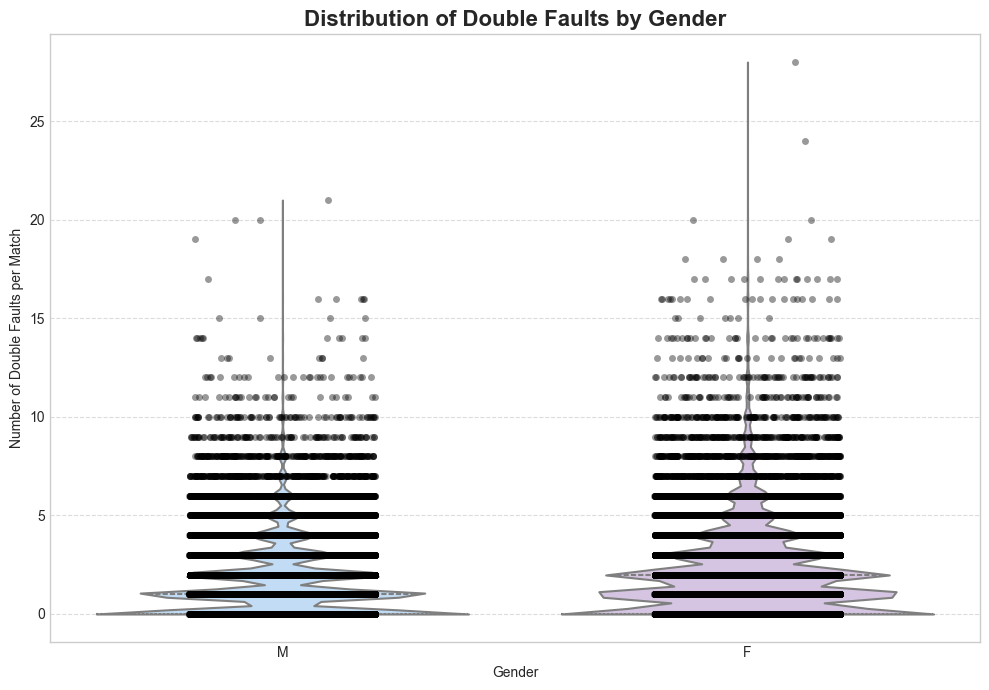


--- Descriptive Statistics by Gender ---
          count      mean       std  min  25%  50%  75%   max
gender                                                       
F       30950.0  2.107981  2.249022  0.0  0.0  2.0  3.0  28.0
M       40166.0  1.599064  1.801070  0.0  0.0  1.0  2.0  21.0

--- Independent Two-Sample T-Test ---
T-statistic: -32.5674
P-value: 0.0000
Statistically significant difference between genders.

--- Final Combined Player DataFrame Info ---
(71116, 4)
   match_id gender country  double_faults
0  11998445      M  France              2
1  11998445      M  France              1
2  11998445      M  France              1
3  11998445      M  France              0
4  11998446      M  France              2


C:\Users\Parsan Afzar\AppData\Local\Temp\ipykernel_15616\268324144.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_avg_df.head(10), x='double_faults', y='country', palette='pastel')


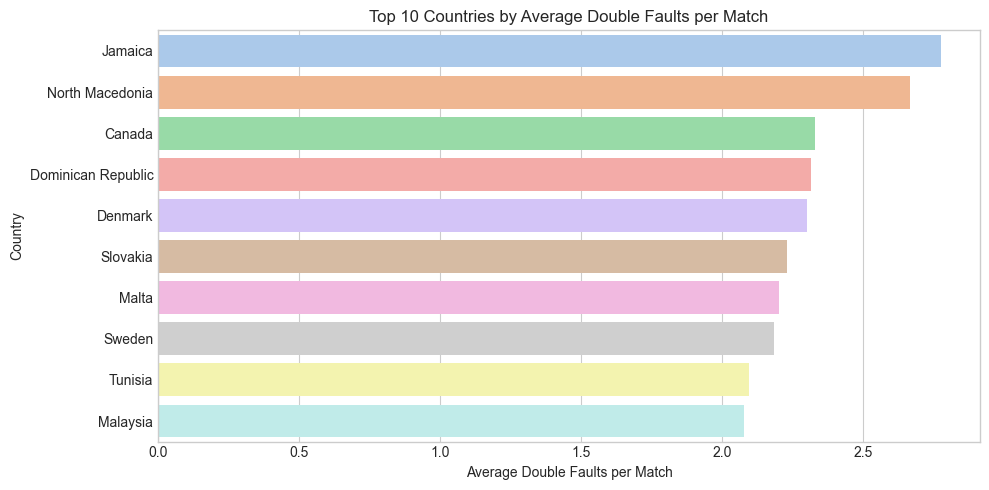


--- Final Combined Player DataFrame Info ---
(65120, 4)
             full_name country gender  double_faults
0       Cazaux, Arthur  France      M              2
1       Cazaux, Arthur  France      M              1
2       Cazaux, Arthur  France      M              1
3       Cazaux, Arthur  France      M              0
4  Lestienne, Constant  France      M              2


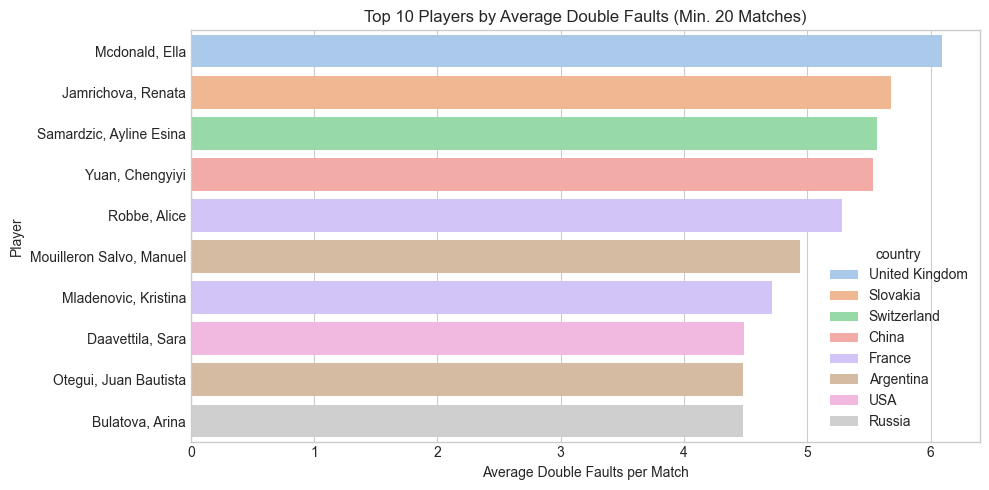

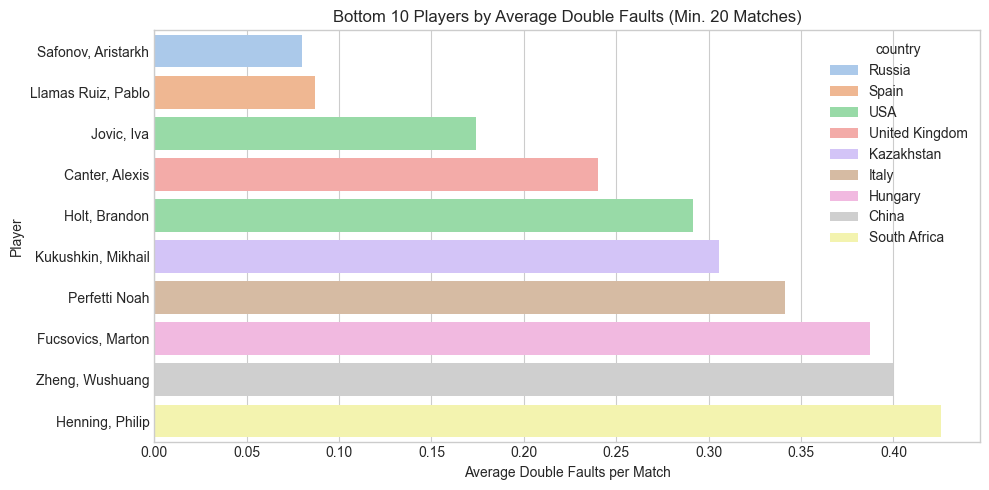

In [ ]:
double_faults_data = statistic_data.query("statistic_name == 'double_faults'").copy()

if 'home_team_data' in locals() and 'away_team_data' in locals():
    df = double_faults_data
    df = df.merge(home_team_data[['match_id', 'gender']], on='match_id', how='left', suffixes=('', '_home'))
    df = df.merge(away_team_data[['match_id', 'gender']], on='match_id', how='left', suffixes=('_home', '_away'))
    df['gender'] = df['gender_home'].fillna(df['gender_away'])
    df.drop(columns=['gender_home', 'gender_away'], inplace=True)
else:
    print("⚠️ Missing team data. Skipping analysis.")
    exit()

home_df = df[['match_id', 'gender', 'home_value']].rename(columns={'home_value': 'double_faults'})
home_df['team'] = 'home'

away_df = df[['match_id', 'gender', 'away_value']].rename(columns={'away_value': 'double_faults'})
away_df['team'] = 'away'

combined_df = pd.concat([home_df, away_df], ignore_index=True)
combined_df.dropna(subset=['double_faults', 'gender'], inplace=True)
combined_df['double_faults'] = pd.to_numeric(combined_df['double_faults'], errors='coerce')

# Visualizing the Data
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))

sns.violinplot(data=combined_df, x='gender', y='double_faults',
               hue='gender', palette=['#b8dcfd', '#d5c0e7'], legend=False,
               inner='quartile', cut=0, linewidth=1.5)

sns.stripplot(data=combined_df, x='gender', y='double_faults',
              color='black', alpha=0.4, jitter=0.2)

plt.title('Distribution of Double Faults by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Double Faults per Match')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q8')
file_name = "Distribution of Double Faults by Gender.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

print("\n--- Descriptive Statistics by Gender ---")
print(combined_df.groupby('gender')['double_faults'].describe())

male = combined_df[combined_df['gender'] == 'M']['double_faults']
female = combined_df[combined_df['gender'] == 'F']['double_faults']

t_stat, p_val = stats.ttest_ind(male, female, equal_var=False, nan_policy='omit')

print("\n--- Independent Two-Sample T-Test ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Statistically significant difference between genders.")
else:
    print("No statistically significant difference between genders.")

## Double Faults by Country

if statistic_data is not None and home_team_data is not None and away_team_data is not None:
    double_faults_data = statistic_data[statistic_data['statistic_name'] == 'double_faults'].copy()
  
    double_faults_data = pd.merge(double_faults_data, home_team_data[['match_id', 'gender', 'country']], on='match_id', how='left', suffixes=('_stat', '_home'))
    double_faults_data = pd.merge(double_faults_data, away_team_data[['match_id', 'gender', 'country']], on='match_id', how='left', suffixes=('_home', '_away'))
    double_faults_data['gender'] = double_faults_data['gender_home'].fillna(double_faults_data['gender_away'])
    double_faults_data['country'] = double_faults_data['country_home'].fillna(double_faults_data['country_away'])
    double_faults_data.drop(columns=['gender_home', 'gender_away', 'country_home', 'country_away'], inplace=True)
 
    home_df = double_faults_data[['match_id', 'gender', 'country', 'home_value']].copy()
    home_df = home_df.rename(columns={'home_value': 'double_faults'})
    
    away_df = double_faults_data[['match_id', 'gender', 'country', 'away_value']].copy()
    away_df = away_df.rename(columns={'away_value': 'double_faults'})
    
    combined_df = pd.concat([home_df, away_df], ignore_index=True)

    combined_df = combined_df.dropna(subset=['double_faults', 'gender', 'country'])
    combined_df['double_faults'] = pd.to_numeric(combined_df['double_faults'], errors='coerce')
    combined_df = combined_df.dropna(subset=['double_faults'])
    
    print("\n--- Final Combined Player DataFrame Info ---")
    print(combined_df.shape)
    print(combined_df.head())
    
else:
    print("Warning: One or more required DataFrames (statistic_data, home_team_data, away_team_data) were not created. Skipping analysis.")

min_matches = 50
country_counts = combined_df.groupby('country')['double_faults'].count()
countries_with_enough_data = country_counts[country_counts >= min_matches].index

filtered_player_df = combined_df[combined_df['country'].isin(countries_with_enough_data)].copy()

country_avg_df = filtered_player_df.groupby('country')['double_faults'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=country_avg_df.head(10), x='double_faults', y='country', palette='pastel')
plt.title('Top 10 Countries by Average Double Faults per Match')
plt.xlabel('Average Double Faults per Match')
plt.ylabel('Country')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q8')
file_name = "Top 10 Countries by Average Double Faults per Match.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

## Most and Least Double Faults

if statistic_data is not None and home_team_data is not None and away_team_data is not None:
    double_faults_stats = statistic_data[statistic_data['statistic_name'] == 'double_faults'].copy()

    home_player_df = pd.merge(home_team_data, double_faults_stats, on='match_id', how='inner')
    home_player_df = home_player_df.rename(columns={'home_value': 'double_faults'})
    home_player_df = home_player_df[['full_name', 'country', 'gender', 'double_faults']]

    away_player_df = pd.merge(away_team_data, double_faults_stats, on='match_id', how='inner')
    away_player_df = away_player_df.rename(columns={'away_value': 'double_faults'})
    away_player_df = away_player_df[['full_name', 'country', 'gender', 'double_faults']]

    combined_df = pd.concat([home_player_df, away_player_df], ignore_index=True)

    combined_df = combined_df.dropna(subset=['double_faults'])
    combined_df['double_faults'] = pd.to_numeric(combined_df['double_faults'], errors='coerce')
    combined_df = combined_df.dropna(subset=['double_faults'])
    
    print("\n--- Final Combined Player DataFrame Info ---")
    print(combined_df.shape)
    print(combined_df.head())
else:
    print(" DataFrames were not created.")

player_avg_df = combined_df.groupby(['full_name', 'country']).agg(
    double_faults_avg=('double_faults', 'mean'),
    match_count=('double_faults', 'count')
).reset_index()

min_matches = 20
filtered_player_avg = player_avg_df[player_avg_df['match_count'] >= min_matches]

top_players = filtered_player_avg.sort_values(by='double_faults_avg', ascending=False).head(10)
bottom_players = filtered_player_avg.sort_values(by='double_faults_avg', ascending=True).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_players, x='double_faults_avg', y='full_name', hue='country', palette='pastel', dodge=False)
plt.title('Top 10 Players by Average Double Faults (Min. 20 Matches)')
plt.xlabel('Average Double Faults per Match')
plt.ylabel('Player')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q8')
file_name = "Top 10 Players by Average Double Faults (Min. 20 Matches).png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=bottom_players, x='double_faults_avg', y='full_name', hue='country', palette='pastel', dodge=False)
plt.title('Bottom 10 Players by Average Double Faults (Min. 20 Matches)')
plt.xlabel('Average Double Faults per Match')
plt.ylabel('Player')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q8')
file_name = "Bottom 10 Players by Average Double Faults (Min. 20 Matches).png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()


Question 9: Which player has won the most tournaments in a single month? 

Player with most tournament wins in a single month:
winner             Chidekh C.
month                 1970-01
tournament_wins             3
Name: 27, dtype: object


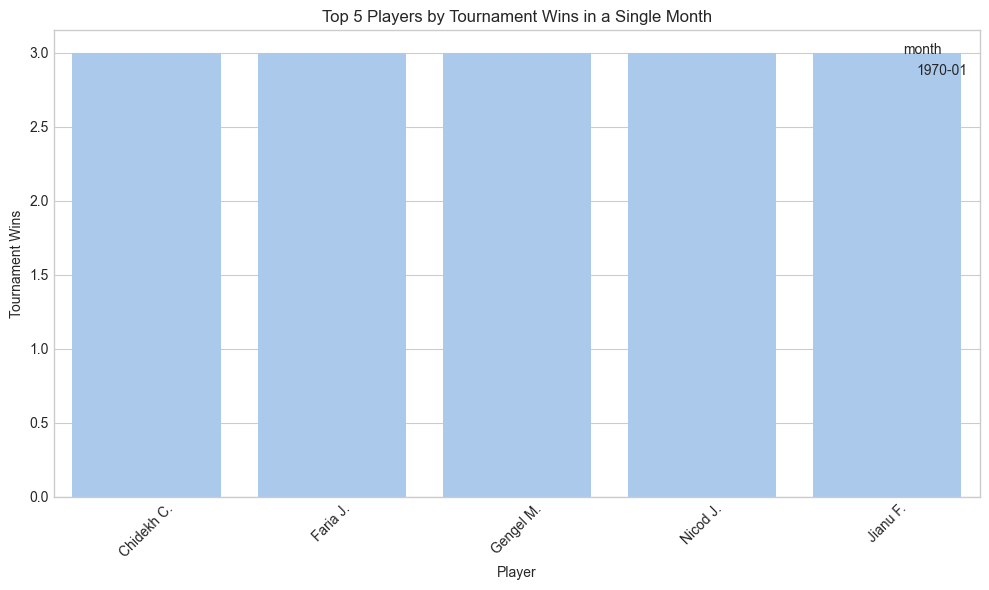

In [82]:
round_tournament = round_data.merge(tournament_data, on='match_id', how='left')
round_tournament_time = round_tournament.merge(time_data, on='match_id', how='left')

final_matches = round_tournament_time[round_tournament_time['name'].str.lower() == 'final']
final_power = final_matches.merge(power_data, on='match_id', how='left')
final_last_game = final_power.sort_values(['match_id', 'set_num', 'game_num']).drop_duplicates(subset=['match_id'], keep='last')

final_with_players = final_last_game.merge(home_team_data, on='match_id', how='left', suffixes=('', '_home'))
final_with_players = final_with_players.merge(away_team_data, on='match_id', how='left', suffixes=('', '_away'))

final_with_players['winner'] = np.where(final_with_players['value'] > 0,
                                        final_with_players['name_home'],
                                        final_with_players['name_away'])

final_with_players['month'] = pd.to_datetime(final_with_players['period_1'], errors='coerce').dt.to_period('M')

monthly_wins = final_with_players.groupby(['winner', 'month']).size().reset_index(name='tournament_wins')

top_player = monthly_wins.loc[monthly_wins['tournament_wins'].idxmax()]

print("Player with most tournament wins in a single month:")
print(top_player)

top5 = monthly_wins.sort_values('tournament_wins', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5, x='winner', y='tournament_wins', hue='month', dodge=False, palette='pastel')
plt.title("Top 5 Players by Tournament Wins in a Single Month")
plt.xlabel("Player")
plt.ylabel("Tournament Wins")
plt.xticks(rotation=45)
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q9')
file_name = "Height vs. Ranking.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

Question 10 : Which country has produced the highest number of distinct tournament winners in the last 5 years?

Spearman ρ = 0.10  (p = 0.000169)


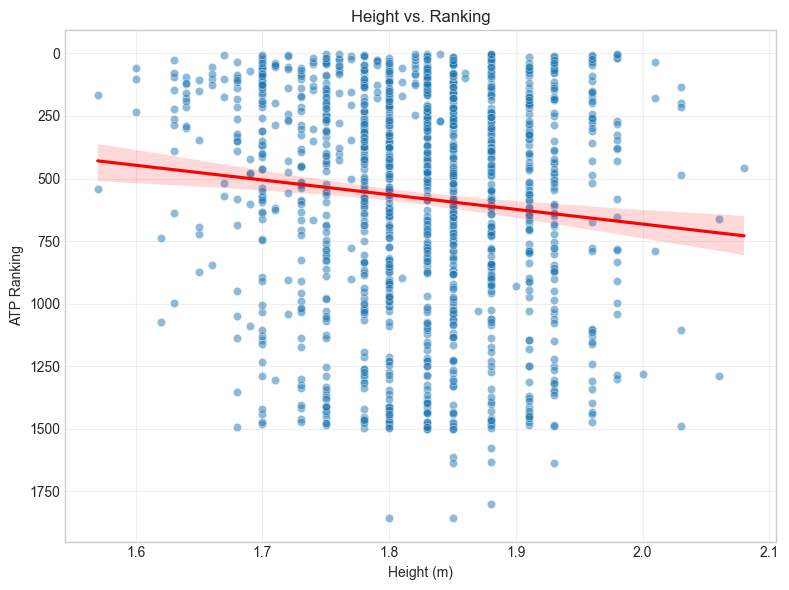

In [81]:
home = home_team_data.copy()
away = away_team_data.copy()

home["side"] = "home"
away["side"] = "away"

players = pd.concat([home, away], ignore_index=True)[
    ["player_id", "height", "current_rank"]
].drop_duplicates("player_id")

players["height"]       = pd.to_numeric(players["height"],       errors="coerce")
players["current_rank"] = pd.to_numeric(players["current_rank"], errors="coerce")

players = players.dropna(subset=["height", "current_rank"])

rho, pval = stats.spearmanr(players["height"], players["current_rank"])
print(f"Spearman ρ = {rho:.2f}  (p = {pval:.3g})")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=players, x="height", y="current_rank", alpha=0.5)
sns.regplot(data=players, x="height", y="current_rank", scatter=False, color="red")

plt.gca().invert_yaxis() 
plt.xlabel("Height (m)")
plt.ylabel("ATP Ranking")
plt.title("Height vs. Ranking")
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q10')
file_name = "Height vs. Ranking.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

Question 11: What is the average duration of matches?

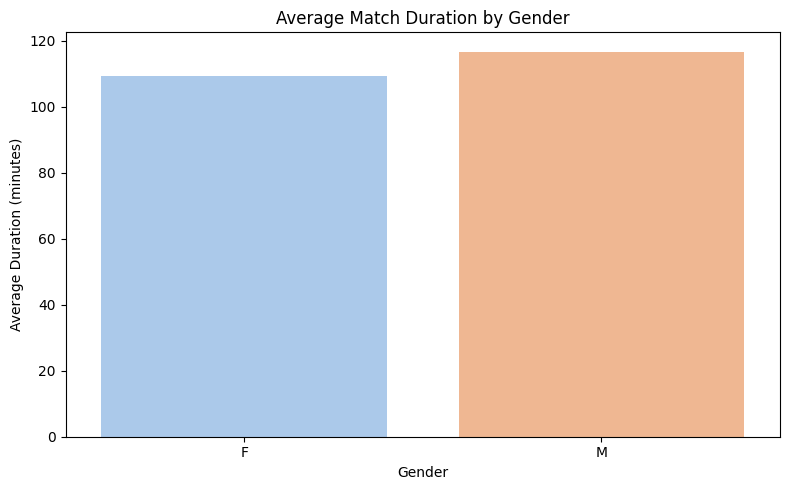

📊 Average match duration (in minutes) by gender:
  gender  total_duration_min
0      F          109.349740
1      M          116.743139


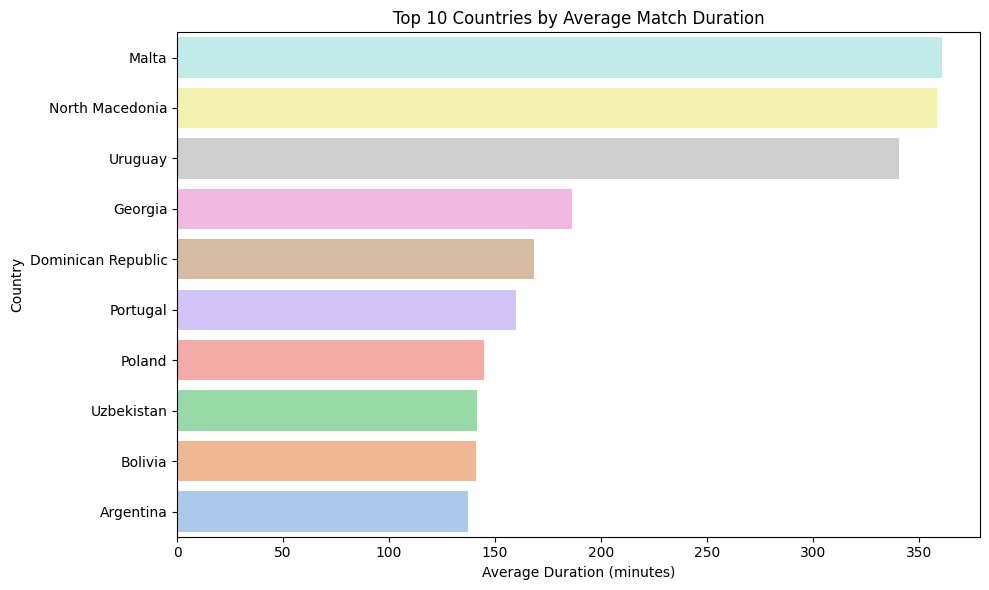

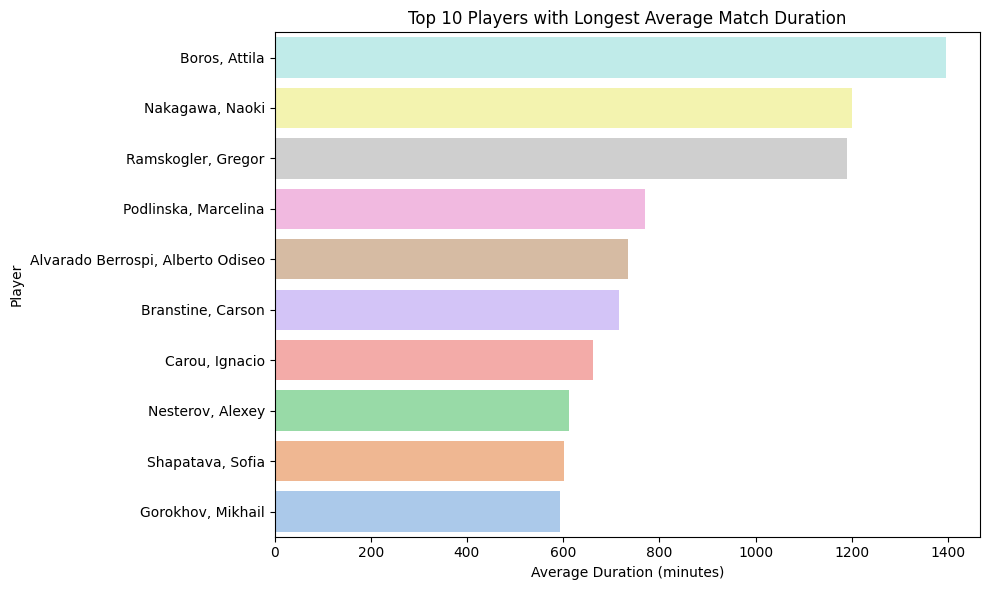

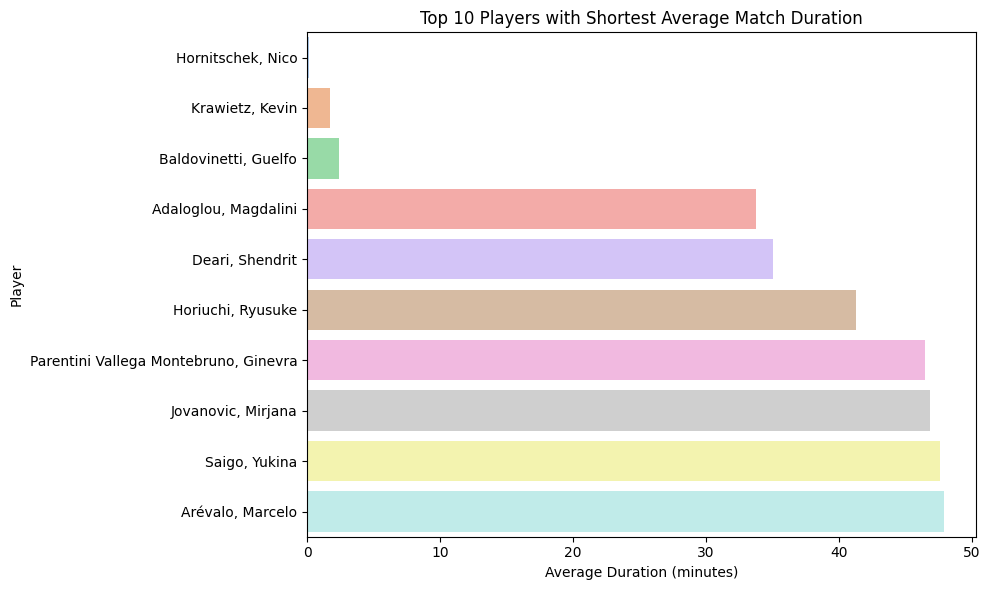


🟩 Players with the Longest Average Match Duration:
                                 player  total_duration_min
245                       Boros, Attila         1396.775000
1510                    Nakagawa, Naoki         1200.658333
1786                 Ramskogler, Gregor         1189.183333
1710               Podlinska, Marcelina          770.575000
43    Alvarado Berrospi, Alberto Odiseo          735.666667
272                   Branstine, Carson          715.361111
343                      Carou, Ignacio          662.280952
1533                   Nesterov, Alexey          612.666667
1988                   Shapatava, Sofia          600.866667
781                   Gorokhov, Mikhail          593.483333

🟦 Players with the Shortest Average Match Duration:
                                     player  total_duration_min
877                       Hornitschek, Nico            0.133333
1118                        Krawietz, Kevin            1.716667
118                    Baldovinetti, Guelfo

In [37]:
## Average Duration of Matched

period_cols = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']
for col in period_cols:
    time_data[col] = pd.to_numeric(time_data[col], errors='coerce')

time_data['total_duration_sec'] = time_data[period_cols].sum(axis=1, skipna=True)
time_data['total_duration_min'] = time_data['total_duration_sec'] / 60

match_gender_df = home_team_data[['match_id', 'gender']].drop_duplicates()
time_gender_df = time_data.merge(match_gender_df, on='match_id', how='left')

time_gender_df = time_gender_df.dropna(subset=['total_duration_min', 'gender'])

avg_duration = time_gender_df.groupby('gender')['total_duration_min'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_duration, x='gender', y='total_duration_min', hue='total_duration_min', palette='pastel', legend=False)
plt.title('Average Match Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Duration (minutes)')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q11')
file_name = "Average Match Duration by Gender.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

print("📊 Average match duration (in minutes) by gender:")
print(avg_duration)

match_country_df = home_team_data[['match_id', 'country']].drop_duplicates()
time_country_df = time_data.merge(match_country_df, on='match_id', how='left')
time_country_df = time_country_df.dropna(subset=['total_duration_min', 'country'])

avg_duration_country = time_country_df.groupby('country')['total_duration_min'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_duration_country.head(10), y='country', x='total_duration_min',hue='total_duration_min', palette='pastel', legend=False)
plt.title('Top 10 Countries by Average Match Duration')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Country')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q11')
file_name = "Top 10 Countries by Average Match Duration.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

home_player_df = time_data.merge(home_team_data[['match_id', 'full_name']], on='match_id', how='left')
home_player_df = home_player_df[['match_id', 'full_name', 'total_duration_min']].dropna()
home_player_df = home_player_df.rename(columns={'full_name': 'player'})

away_player_df = time_data.merge(away_team_data[['match_id', 'full_name']], on='match_id', how='left')
away_player_df = away_player_df[['match_id', 'full_name', 'total_duration_min']].dropna()
away_player_df = away_player_df.rename(columns={'full_name': 'player'})

all_players_df = pd.concat([home_player_df, away_player_df], ignore_index=True)

player_durations = all_players_df.groupby('player')['total_duration_min'].mean().reset_index()

all_players_df = all_players_df.dropna(subset=['total_duration_min'])
all_players_df = all_players_df[all_players_df['total_duration_min'] > 0]

player_durations = all_players_df.groupby('player')['total_duration_min'].mean().reset_index()

top10 = player_durations.sort_values('total_duration_min', ascending=False).head(10)
bottom10 = player_durations.sort_values('total_duration_min', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, y='player', x='total_duration_min', hue ='total_duration_min', palette='pastel', legend=False)
plt.title('Top 10 Players with Longest Average Match Duration')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Player')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q11')
file_name = "Top 10 Players with Longest Average Match Duration.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom10, y='player', x='total_duration_min', hue='total_duration_min', palette='pastel', legend=False)
plt.title('Top 10 Players with Shortest Average Match Duration')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Player')
plt.tight_layout()

# Saving the output as png.
output_directory = Path('../data/output/Q11')
file_name = "Top 10 Players with Shortest Average Match Duration.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)

plt.show()

print("\n🟩 Players with the Longest Average Match Duration:")
print(top10)

print("\n🟦 Players with the Shortest Average Match Duration:")
print(bottom10)


Question 12: What is the average number of games per set in men's matches compared to women's matches?

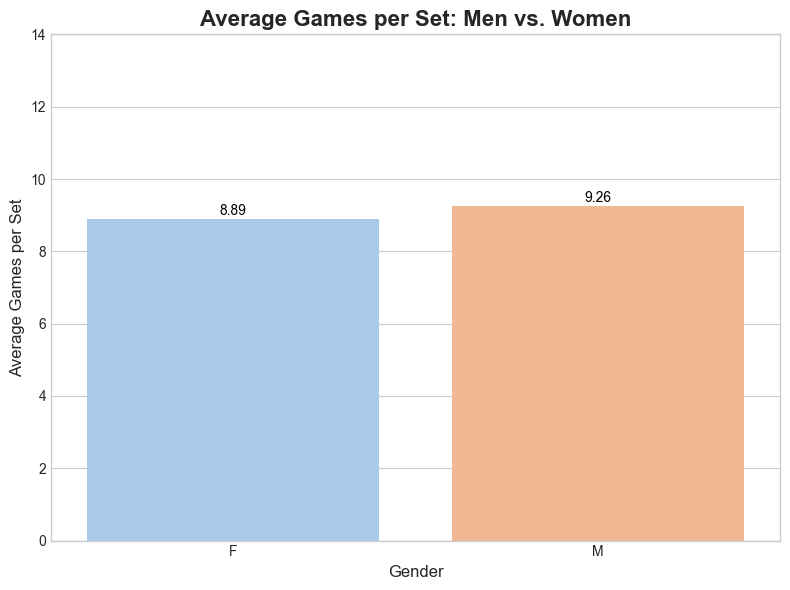

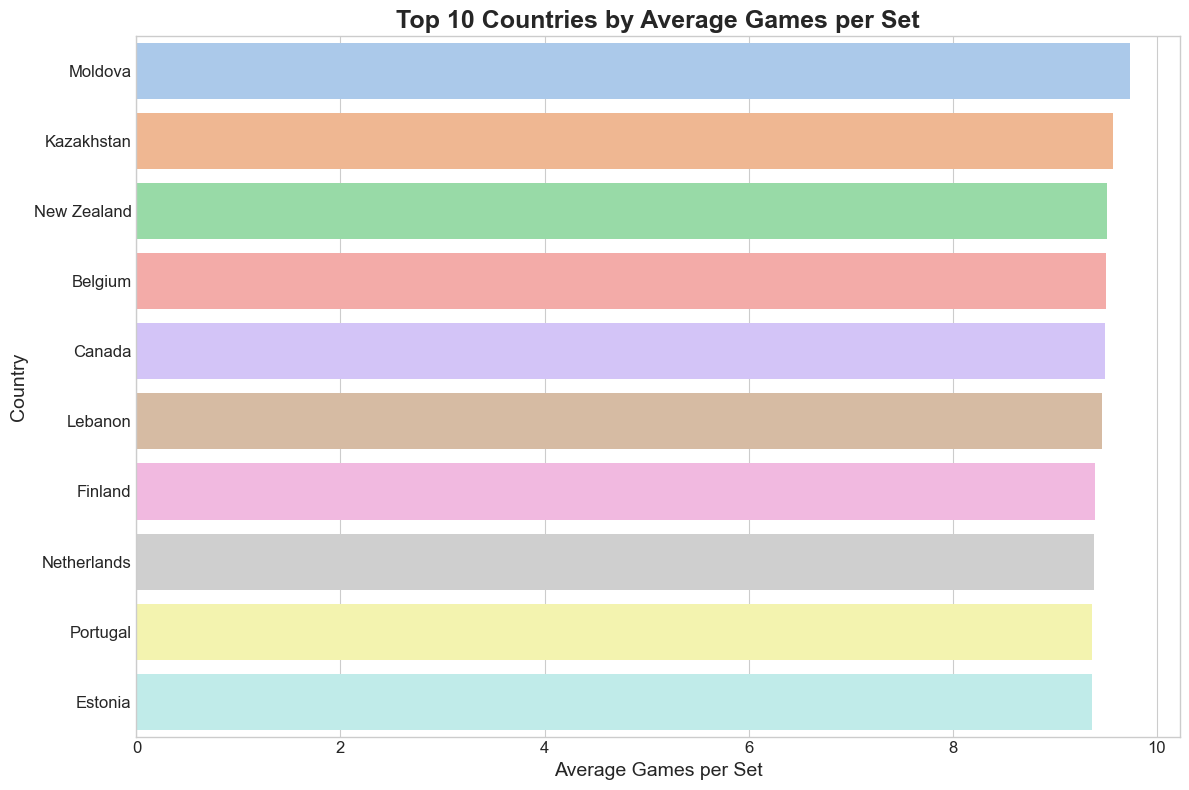

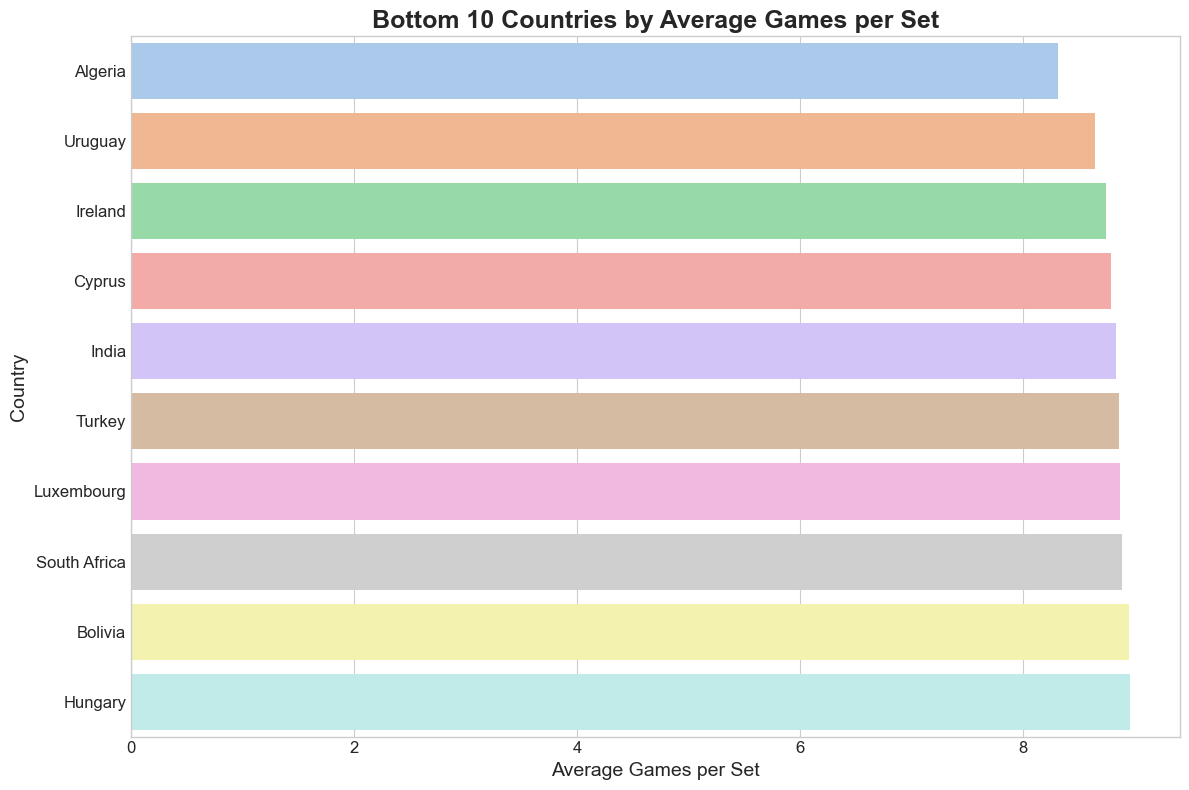

In [39]:
if not away_team_data.empty and not home_team_data.empty and not pbp_data.empty:
    gender_map_df = pd.concat([
        away_team_data[['match_id', 'gender']],
        home_team_data[['match_id', 'gender']]
    ], ignore_index=True).drop_duplicates(subset=['match_id', 'gender'])

    games_per_set_df = pbp_data.groupby(['match_id', 'set_id'])['game_id'].nunique().reset_index()
    games_per_set_df.rename(columns={'game_id': 'total_games_in_set'}, inplace=True)

    final_df = pd.merge(games_per_set_df, gender_map_df, on='match_id', how='left')
    final_df.dropna(subset=['gender', 'total_games_in_set'], inplace=True)

    average_games_by_gender = final_df.groupby('gender')['total_games_in_set'].mean().reset_index()

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(8, 6))

    sns.barplot(data=average_games_by_gender, x='gender', y='total_games_in_set',  hue='total_games_in_set', palette='pastel', legend=False)

    for index, row in average_games_by_gender.iterrows():
        plt.text(index, row['total_games_in_set'] + 0.1, f"{row['total_games_in_set']:.2f}",
                 color='black', ha="center")

    plt.title('Average Games per Set: Men vs. Women', fontsize=16, fontweight='bold')
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Average Games per Set', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(0, 14)
    plt.tight_layout()

    # Saving the output as png.
    output_directory = Path('../data/output/Q12')
    file_name = "Average Games per Set Men vs Women.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)

    plt.show()

else:
    print("Required dataframes could not be loaded. Analysis cannot proceed.")

if not away_team_data.empty and not home_team_data.empty and not pbp_data.empty:
    country_map_df = pd.concat([
        away_team_data[['match_id', 'country']],
        home_team_data[['match_id', 'country']]
    ], ignore_index=True).drop_duplicates(subset=['match_id', 'country'])

    games_per_set_df = pbp_data.groupby(['match_id', 'set_id'])['game_id'].nunique().reset_index()
    games_per_set_df.rename(columns={'game_id': 'total_games_in_set'}, inplace=True)

    final_df = pd.merge(games_per_set_df, country_map_df, on='match_id', how='left')
    final_df.dropna(subset=['country', 'total_games_in_set'], inplace=True)

    average_games_by_country = final_df.groupby('country')['total_games_in_set'].mean().reset_index()


    set_counts_by_country = final_df.groupby('country').size()
    min_sets = 50 
    reliable_countries = set_counts_by_country[set_counts_by_country >= min_sets].index
    
    filtered_avg_games = average_games_by_country[average_games_by_country['country'].isin(reliable_countries)]

    top_10_countries = filtered_avg_games.sort_values(by='total_games_in_set', ascending=False).head(10)
    bottom_10_countries = filtered_avg_games.sort_values(by='total_games_in_set', ascending=True).head(10)

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_10_countries, x='total_games_in_set', y='country', hue='country', palette='pastel', legend=False)

    plt.title('Top 10 Countries by Average Games per Set', fontsize=18, fontweight='bold')
    plt.xlabel('Average Games per Set', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # Saving the output as png.
    output_directory = Path('../data/output/Q12')
    file_name = "Top 10 Countries by Average Games per Set.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)

    plt.show()

    plt.figure(figsize=(12, 8))
    sns.barplot(data=bottom_10_countries, x='total_games_in_set', y='country', hue='country', palette='pastel', legend=False)
    
    plt.title('Bottom 10 Countries by Average Games per Set', fontsize=18, fontweight='bold')
    plt.xlabel('Average Games per Set', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # Saving the output as png.
    output_directory = Path('../data/output/Q12')
    file_name = "Bottom 10 Countries by Average Games per Set.png" 
    full_path = output_directory / file_name
    plt.savefig(full_path, dpi=300)

    plt.show()

else:
    print("Required dataframes could not be loaded. Analysis cannot proceed.")

Question 13:  What is the distribution of left-handed versus right-handed players?

plays
Right-handed    10424
Left-handed      1371
Name: count, dtype: int64


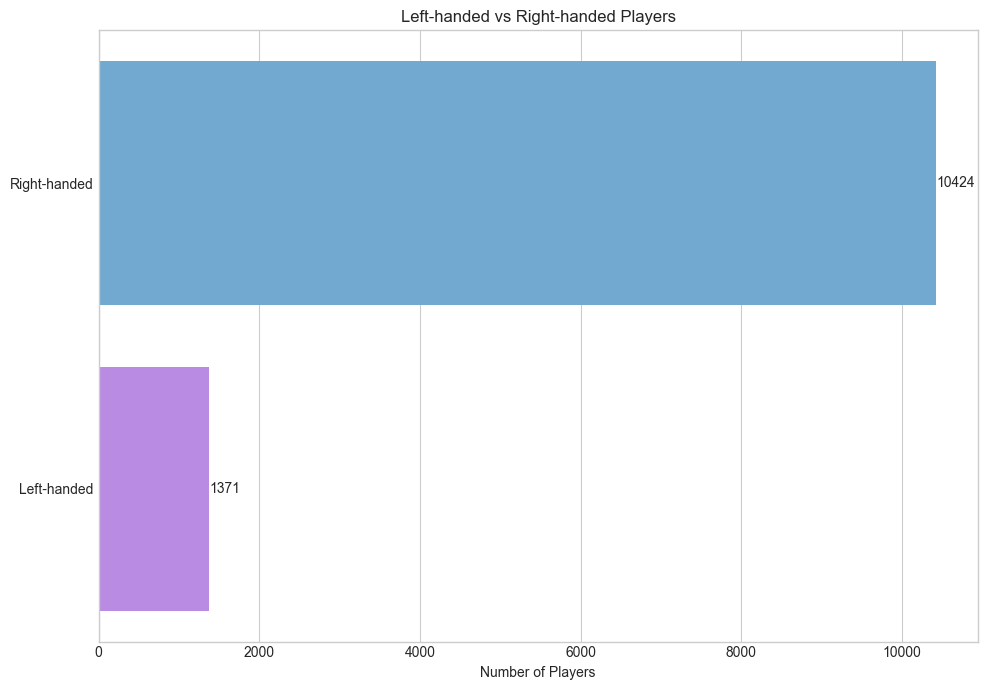

In [64]:
home_plays = home_team_data['plays'].dropna()
away_plays = away_team_data['plays'].dropna()
all_plays = pd.concat([home_plays, away_plays])

all_plays = all_plays.str.lower().str.contains('left').map({True: 'Left-handed', False: 'Right-handed'})

hand_counts = all_plays.value_counts()

print(hand_counts)

plt.figure(figsize=(10,7))
sns.barplot(
    x=hand_counts.values,
    y=hand_counts.index,
    hue=hand_counts.index,
    palette=["#62ace0", "#b97cf2"],
    legend=False
)
plt.title('Left-handed vs Right-handed Players')
plt.xlabel('Number of Players')
plt.ylabel('')
for i, v in enumerate(hand_counts.values):
    plt.text(v + 10, i, str(v), va='center')
plt.tight_layout()
# Saving the output as png.
output_directory = Path('../data/output/Q13')
file_name = "Left-handed vs Right-handed Players.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)
plt.show()

Question 14 :  What is the most common type of surface used in tournaments?

Most common surface: Hardcourt outdoor (8116 tournaments)


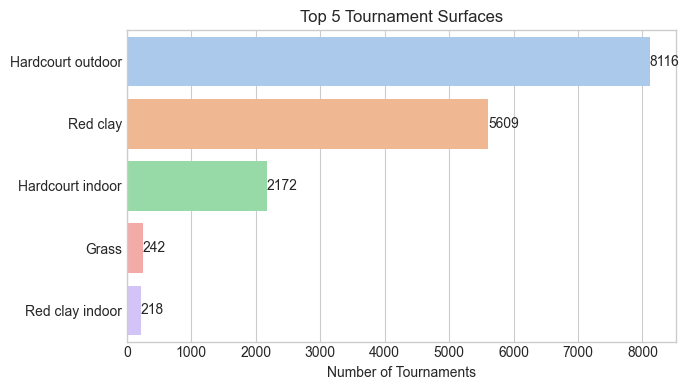

In [57]:
surface_counts = tournament_data['ground_type'].dropna().value_counts()

most_common_surface = surface_counts.index[0]

print(f"Most common surface: {most_common_surface} ({surface_counts.iloc[0]} tournaments)")

plt.figure(figsize=(7, 4))
sns.barplot(
    x=surface_counts.head(5).values,
    y=surface_counts.head(5).index,
    hue=surface_counts.head(5).index,
    palette='pastel',
    legend=False
)
plt.title('Top 5 Tournament Surfaces')
plt.xlabel('Number of Tournaments')
plt.ylabel('')
for i, v in enumerate(surface_counts.head(5).values):
    plt.text(v + 0.2, i, str(v), va='center')
plt.tight_layout()
# Saving the output as png.
output_directory = Path('../data/output/Q14')
file_name = "Top 5 Tournament Surfaces.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)
plt.show()

Question 15:  How many distinct countries are represented in the dataset? 

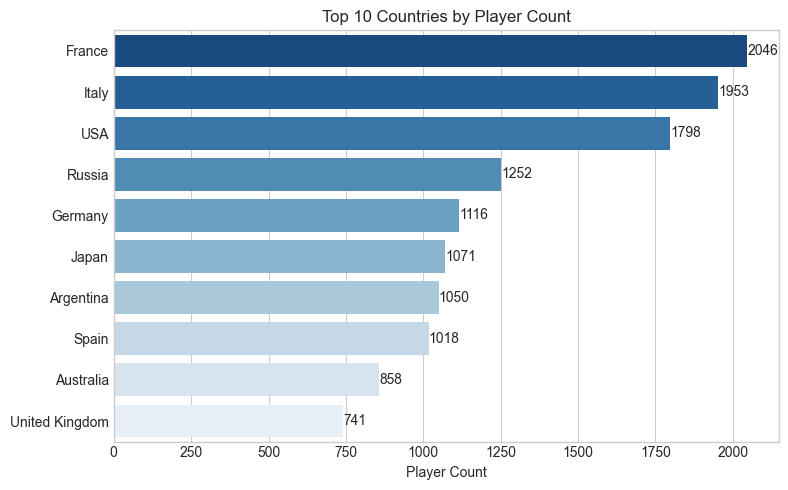

In [54]:
home_countries = home_team_data['country'].dropna()
away_countries = away_team_data['country'].dropna()
all_countries = pd.concat([home_countries, away_countries])

top10 = all_countries.value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top10.values,
    y=top10.index,
    hue=top10.index,
    palette='Blues_r',
    legend=False
)
plt.title('Top 10 Countries by Player Count')
plt.xlabel('Player Count')
plt.ylabel('')
for i, v in enumerate(top10.values):
    plt.text(v + 0.1, i, str(v), va='center')
plt.tight_layout()
# Saving the output as png.
output_directory = Path('../data/output/Q15')
file_name = "Top 10 Countries by Player Count.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)
plt.show()

Question 16: Which player has the highest winning percentage against top 10 ranked opponents?

🏆 Top 10 Players by Wins Against Top 10 Opponents:
                  winner  wins_vs_top10  matches_vs_top10
2       Altmaier, Daniel              1                 1
14  Haddad Maia, Beatriz              1                 1
4       Avanesyan, Elina              1                 1
7      Bublik, Alexander              1                 1
15          Humbert, Ugo              3                 3
44       Volynets, Katie              1                 1
41      Thompson, Jordan              1                 1
42       Tsurenko, Lesia              1                 1
48          Ćorić, Borna              1                 1
40          Swiatek, Iga              3                 3


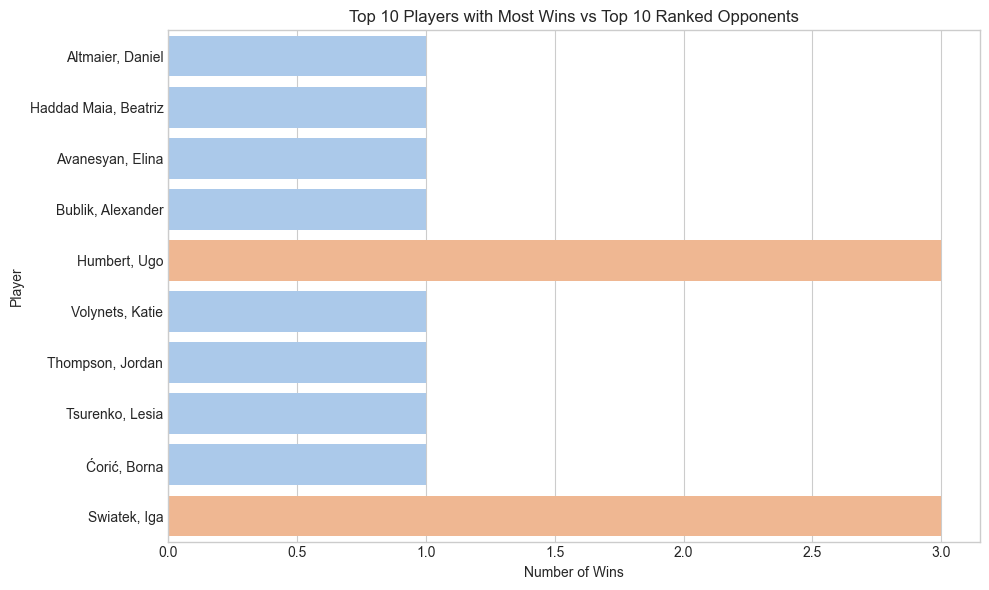

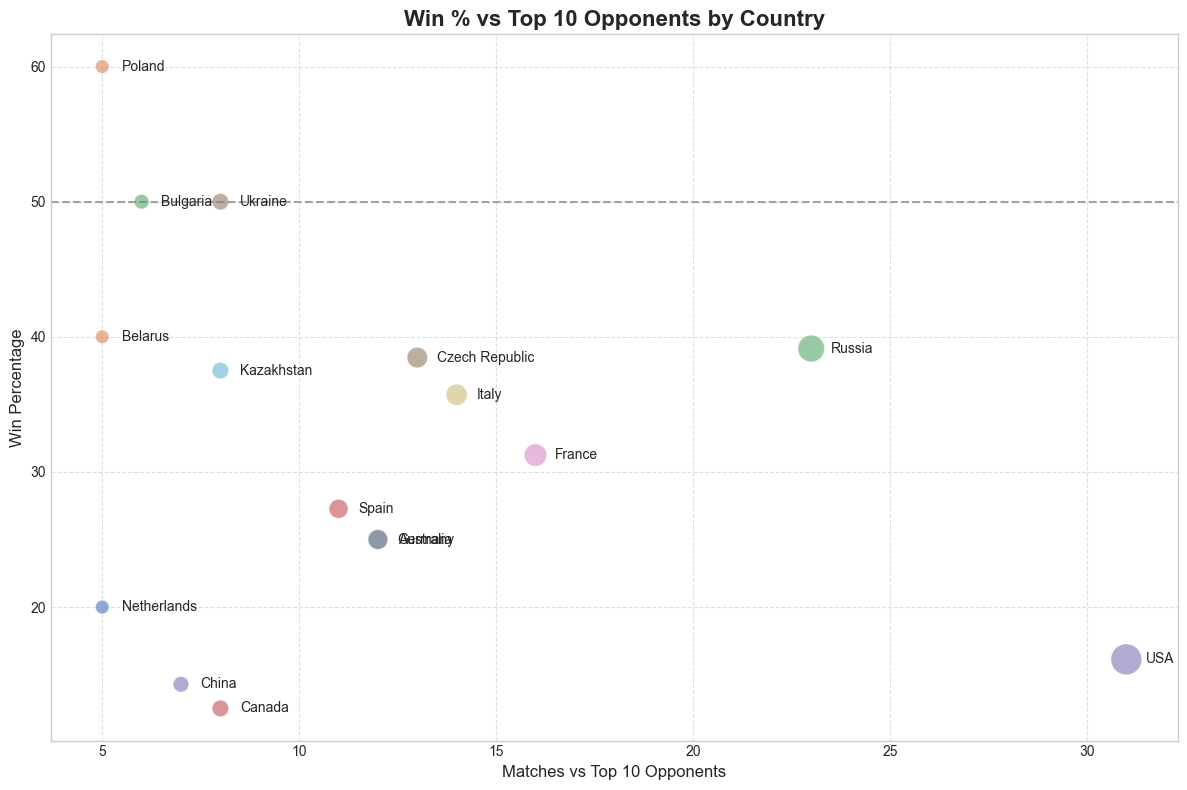

    winner_country  wins_vs_top10         country  matches_vs_top10  \
16          Poland              3          Poland                 5   
3         Bulgaria              3        Bulgaria                 6   
21         Ukraine              4         Ukraine                 8   
1          Belarus              2         Belarus                 5   
18          Russia              9          Russia                23   
8   Czech Republic              5  Czech Republic                13   
14      Kazakhstan              3      Kazakhstan                 8   
13           Italy              5           Italy                14   
9           France              5          France                16   
19           Spain              3           Spain                11   

    win_percentage  
16       60.000000  
3        50.000000  
21       50.000000  
1        40.000000  
18       39.130435  
8        38.461538  
14       37.500000  
13       35.714286  
9        31.250000  
19      

In [50]:
home_df = home_team_data[['match_id', 'full_name', 'current_rank']].copy()
home_df.columns = ['match_id', 'home_player', 'home_rank']

away_df = away_team_data[['match_id', 'full_name', 'current_rank']].copy()
away_df.columns = ['match_id', 'away_player', 'away_rank']

merged_df = event_data.merge(home_df, on='match_id', how='inner')
merged_df = merged_df.merge(away_df, on='match_id', how='inner')

merged_df['winner'] = np.where(merged_df['winner_code'] == 1, merged_df['home_player'],
                               np.where(merged_df['winner_code'] == 2, merged_df['away_player'], None))

merged_df['opponent'] = np.where(merged_df['winner_code'] == 1, merged_df['away_player'],
                                 np.where(merged_df['winner_code'] == 2, merged_df['home_player'], None))

merged_df['opponent_rank'] = np.where(merged_df['winner_code'] == 1, merged_df['away_rank'],
                                      np.where(merged_df['winner_code'] == 2, merged_df['home_rank'], None))

merged_df = merged_df.dropna(subset=['winner', 'opponent', 'opponent_rank'])

merged_df['opponent_rank'] = pd.to_numeric(merged_df['opponent_rank'], errors='coerce')
merged_df = merged_df.dropna(subset=['opponent_rank'])
merged_df['opponent_top10'] = merged_df['opponent_rank'] <= 10

wins_vs_top10 = merged_df[merged_df['opponent_top10']].groupby('winner').size().reset_index(name='wins_vs_top10')

home_top10 = merged_df[(merged_df['away_rank'] <= 10)][['match_id', 'home_player']].rename(columns={'home_player': 'player'})
away_top10 = merged_df[(merged_df['home_rank'] <= 10)][['match_id', 'away_player']].rename(columns={'away_player': 'player'})

matches_vs_top10 = pd.concat([home_top10, away_top10], ignore_index=True)
matches_vs_top10 = matches_vs_top10.groupby('player').size().reset_index(name='matches_vs_top10')

result_df = wins_vs_top10.merge(matches_vs_top10, left_on='winner', right_on='player', how='inner')
result_df['win_percentage'] = (result_df['wins_vs_top10'] / result_df['matches_vs_top10']) * 100

top_players = result_df.sort_values('win_percentage', ascending=False).head(10)

print("🏆 Top 10 Players by Wins Against Top 10 Opponents:")
print(top_players[['winner', 'wins_vs_top10', 'matches_vs_top10']])
plt.figure(figsize=(10, 6))
sns.barplot(data=top_players, y='winner', x='wins_vs_top10', hue='wins_vs_top10',palette='pastel', legend=False)
plt.title('Top 10 Players with Most Wins vs Top 10 Ranked Opponents')
plt.xlabel('Number of Wins')
plt.ylabel('Player')
plt.tight_layout()
# Saving the output as png.
output_directory = Path('../data/output/Q16')
file_name = "Top 10 Players with Most Wins vs Top 10 Ranked Opponents.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)
plt.show()

home_player_country_map = home_team_data.drop_duplicates(subset=['full_name'], keep='first').set_index('full_name')['country']

away_player_country_map = away_team_data.drop_duplicates(subset=['full_name'], keep='first').set_index('full_name')['country']

merged_df['home_country'] = merged_df['home_player'].map(home_player_country_map)
merged_df['away_country'] = merged_df['away_player'].map(away_player_country_map)

merged_df['winner_country'] = np.where(merged_df['winner_code'] == 1, merged_df['home_country'],
                                       np.where(merged_df['winner_code'] == 2, merged_df['away_country'], None))

merged_df = merged_df.dropna(subset=['opponent_rank', 'winner_country'])
merged_df['opponent_top10'] = merged_df['opponent_rank'] <= 10

wins_by_country = merged_df[merged_df['opponent_top10']].groupby('winner_country').size().reset_index(name='wins_vs_top10')

home_top10 = merged_df[merged_df['away_rank'] <= 10][['match_id', 'home_country']].rename(columns={'home_country': 'country'})
away_top10 = merged_df[merged_df['home_rank'] <= 10][['match_id', 'away_country']].rename(columns={'away_country': 'country'})

matches_by_country = pd.concat([home_top10, away_top10]).groupby('country').size().reset_index(name='matches_vs_top10')

country_stats = wins_by_country.merge(matches_by_country, left_on='winner_country', right_on='country', how='inner')
country_stats['win_percentage'] = (country_stats['wins_vs_top10'] / country_stats['matches_vs_top10']) * 100

country_stats = country_stats[country_stats['matches_vs_top10'] >= 5]

plt.figure(figsize=(12, 8))

scatter_plot = sns.scatterplot(
    data=country_stats,
    x='matches_vs_top10',
    y='win_percentage',
    hue='country',
    size='matches_vs_top10',
    sizes=(100, 500),
    alpha=0.6,
    palette='deep',
    legend=False 
)

for i, row in country_stats.iterrows():
    plt.text(
        x=row['matches_vs_top10'] + 0.5, 
        y=row['win_percentage'],
        s=row['country'],
        ha='left',
        va='center',
        fontsize=10
    )

plt.axhline(50, color='gray', linestyle='--', alpha=0.7)

plt.title('Win % vs Top 10 Opponents by Country', fontsize=16, fontweight='bold')
plt.xlabel('Matches vs Top 10 Opponents', fontsize=12)
plt.ylabel('Win Percentage', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.tight_layout()
# Saving the output as png.
output_directory = Path('../data/output/Q16')
file_name = "Win % vs Top 10 Opponents by Country.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)
plt.show()

print(country_stats.sort_values('win_percentage', ascending=False).head(10))

Question 17 :  What is the average number of breaks of serve per match?


🎾 Average Number of Breaks per Match: 6.93


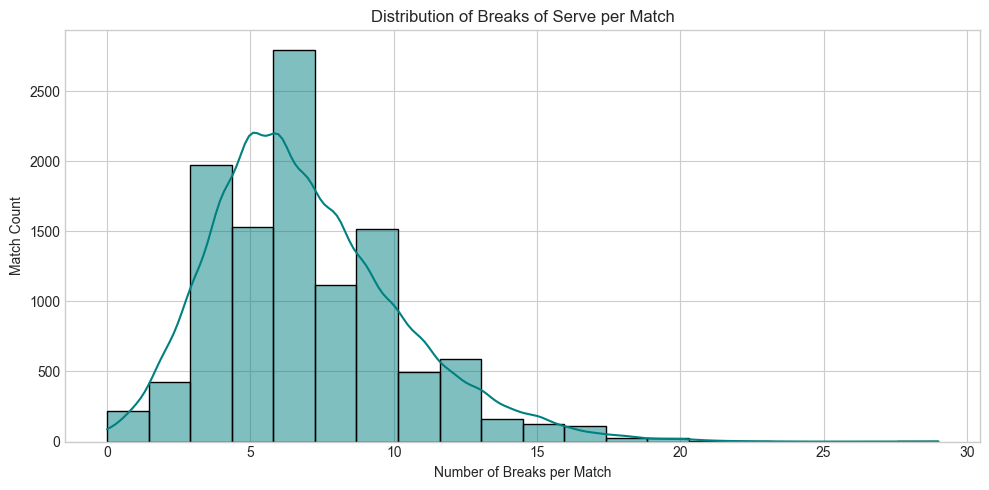

Average Number of Breaks per Match by Gender:
  gender  num_breaks
0      F    8.083681
1      M    6.033898


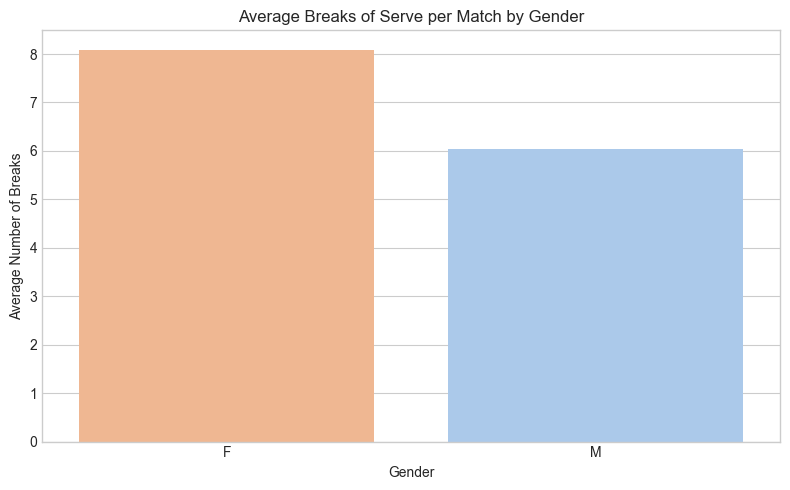

In [44]:
power_data['break_occurred'] = power_data['break_occurred'].astype(bool)

breaks_per_match = power_data.groupby('match_id')['break_occurred'].sum().reset_index(name='num_breaks')

average_breaks = breaks_per_match['num_breaks'].mean()
print(f"\n🎾 Average Number of Breaks per Match: {average_breaks:.2f}")


plt.figure(figsize=(10, 5))
sns.histplot(breaks_per_match['num_breaks'], bins=20, kde=True, color='teal')
plt.title('Distribution of Breaks of Serve per Match')
plt.xlabel('Number of Breaks per Match')
plt.ylabel('Match Count')
plt.tight_layout()
# Saving the output as png.
output_directory = Path('../data/output/Q17')
file_name = "Distribution of Breaks of Serve per Match.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)
plt.show()

power_data['break_occurred'] = power_data['break_occurred'].astype(bool)

breaks_per_match = power_data.groupby('match_id')['break_occurred'].sum().reset_index(name='num_breaks')

match_gender = home_team_data[['match_id', 'gender']].drop_duplicates()

breaks_with_gender = breaks_per_match.merge(match_gender, on='match_id', how='left')
breaks_with_gender = breaks_with_gender.dropna(subset=['gender'])

avg_breaks_by_gender = breaks_with_gender.groupby('gender')['num_breaks'].mean().reset_index()
print("Average Number of Breaks per Match by Gender:")
print(avg_breaks_by_gender)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_breaks_by_gender, x='gender', y='num_breaks', hue='num_breaks', palette='pastel', legend=False)
plt.title('Average Breaks of Serve per Match by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Breaks')
plt.tight_layout()
# Saving the output as png.
output_directory = Path('../data/output/Q17')
file_name = "verage Breaks of Serve per Match by Gender.png" 
full_path = output_directory / file_name
plt.savefig(full_path, dpi=300)
plt.show()